# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.8 MB/s eta 0:00:00


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, recall_score, precision_score,classification_report
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# **Loading the Data**

In [2]:
#mounting drive to load train and test csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Overview**

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Test.csv")
#Load both csv files into df_train and df_test data frame variables

In [4]:
df_train.info()
#information about df_train - looks like 40 features and there are  null values for V1 and V2 and only target is in int data type and we need to convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [5]:
df_test.info()
#looks like 40 features in test df as well and there are  null values for V1 and V2 and only target is in int data type and we need to convert

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [6]:
#just to reverify again
df_train.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [7]:
df_test.isnull().sum()
#its confirmed that there are no null values, lets check duplicate values

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [8]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
#Awesome, there are no duplicates

0
0


In [9]:
data_train=df_train.copy()
data_test=df_test.copy()
#Take a copy of the entire data set before we manipulate

In [10]:
print(df_train.shape)
print(df_test.shape)
#Train data set has 20K whereas test has 5k rows and 41 features including target

(20000, 41)
(5000, 41)


In [11]:
data_train.describe().T
#printing statistical summary of numerical columns

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [12]:
data_test.describe().T
#printing statistical summary of test data set

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


In [13]:
data_train.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0
5,0.159623,-4.233781,-0.264310,-5.477119,-0.190854,-0.356274,-0.134486,4.066608,-3.858569,1.692441,...,3.227235,0.628900,-1.548860,1.321979,5.461345,1.109410,-3.869993,0.273964,2.805941,0
6,-0.184565,-4.721470,0.864988,-3.078695,-2.226888,-1.282220,-0.804717,3.289733,-1.567971,0.749904,...,-0.544941,-0.762921,0.815558,1.889373,3.624347,1.555740,-5.432884,0.678703,0.464697,0
7,1.734840,1.682945,-1.269070,4.600630,-1.416975,-2.543916,0.131648,-0.198661,3.094057,-1.109324,...,1.717474,-3.838931,1.569448,1.794899,-4.268517,-0.516195,-0.619218,-0.830889,-4.967266,1
8,1.781583,1.314664,4.248690,-0.518293,-0.149044,0.033082,-1.087893,-3.117561,0.624935,1.567455,...,1.611014,2.951390,-1.862016,4.389598,1.371300,-2.516235,0.770496,0.831132,-2.310953,0
9,-0.894140,4.011498,5.251902,3.320747,0.727067,-4.771070,1.031232,3.632080,-1.391444,-1.966746,...,-0.635742,-4.449139,2.296340,1.575110,1.376268,0.596757,-1.413652,0.543871,0.035020,0


In [14]:
data_train['Target']=df_train['Target'].astype(float)
data_test['Target']=df_test['Target'].astype(float)
#Converted target column to float just like other features on the backed up data sets

In [15]:
data_train['Target'].info()
#It has conveted to float data type here

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: Target
Non-Null Count  Dtype  
--------------  -----  
20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB


# **Exploratory Data Analysis**

In [16]:
#This function has been copied from previous project as a reusable component
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Univariate analysis

/tmp/ipython-input-16-4115300254.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f2, (ax_box2, ax_hist2) = plt.subplots(


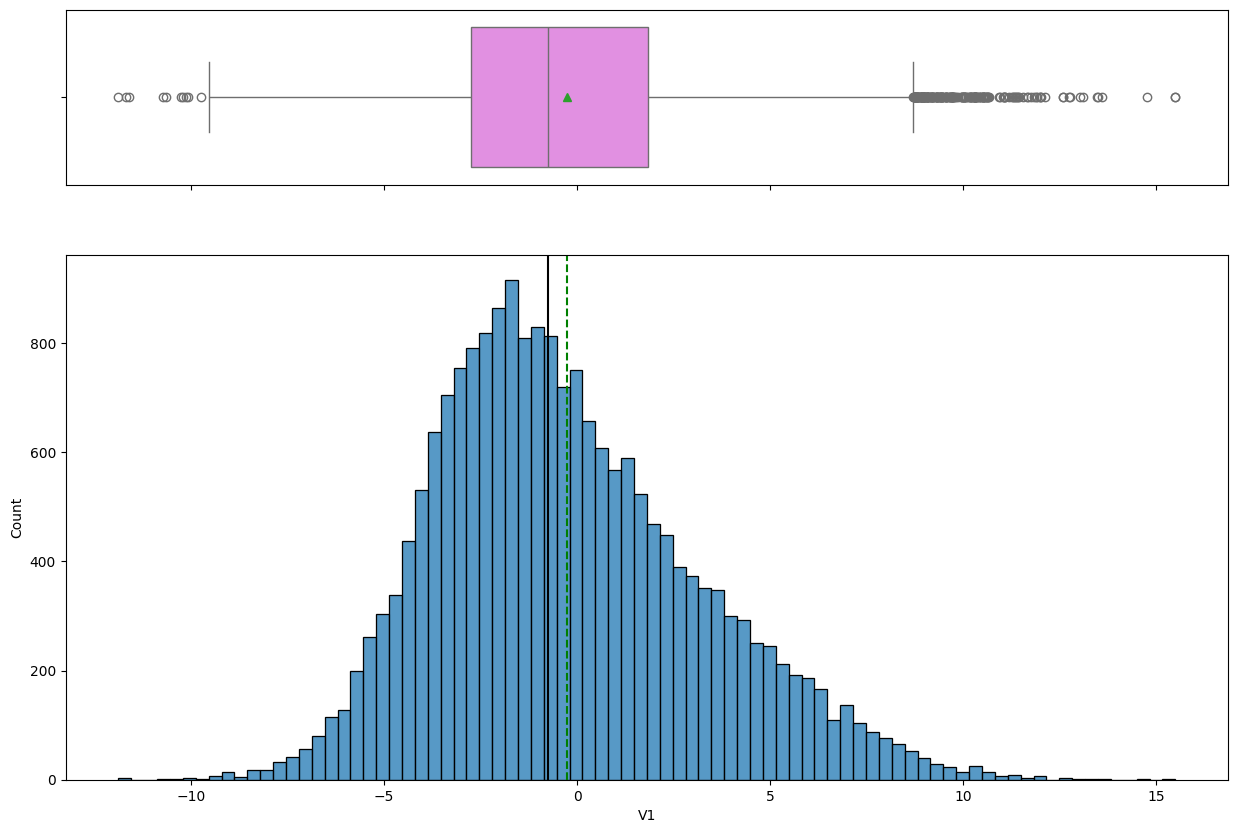

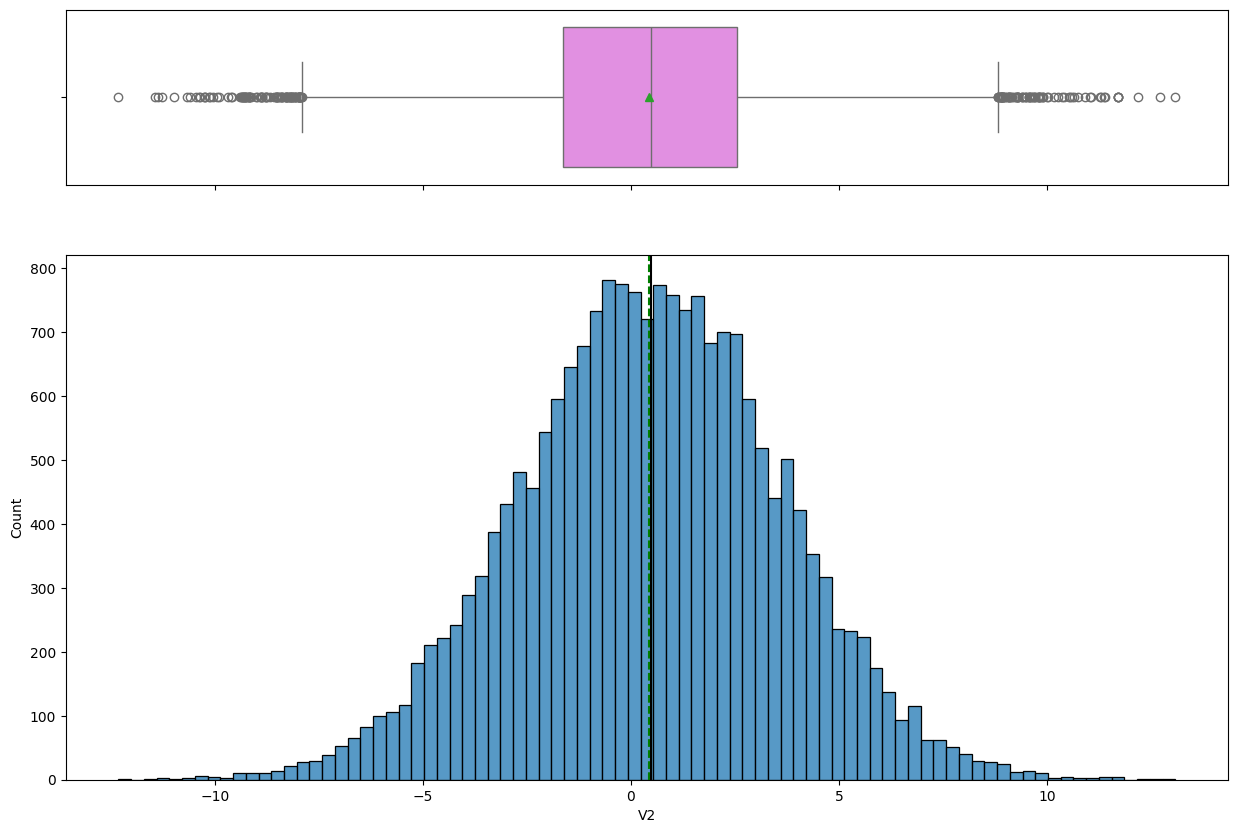

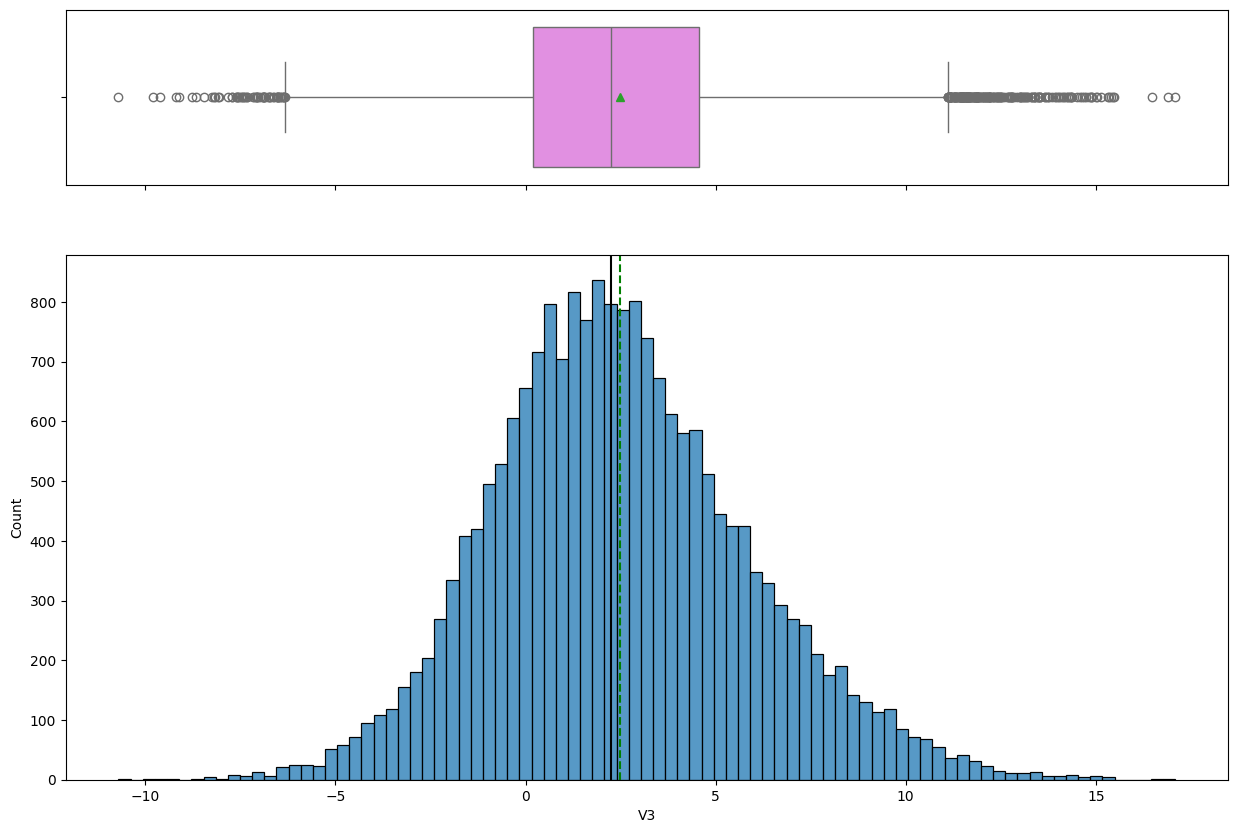

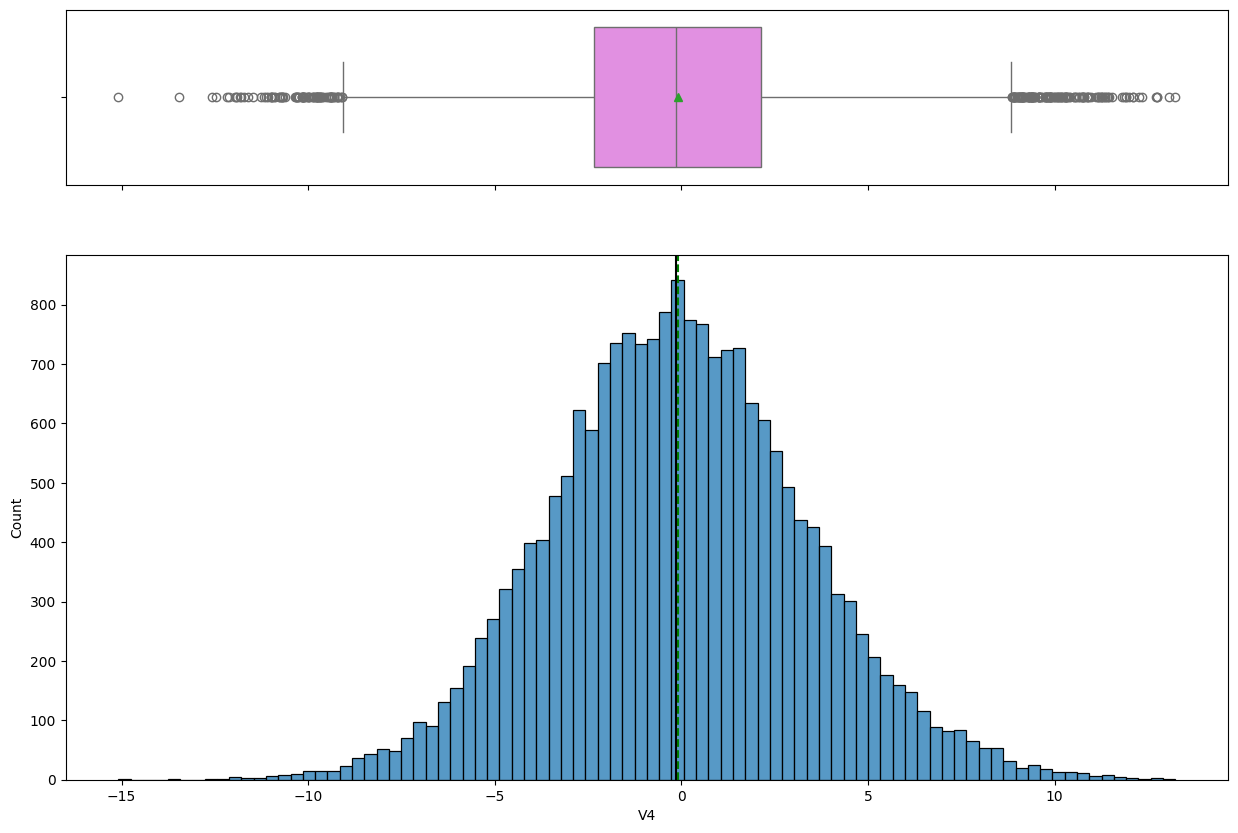

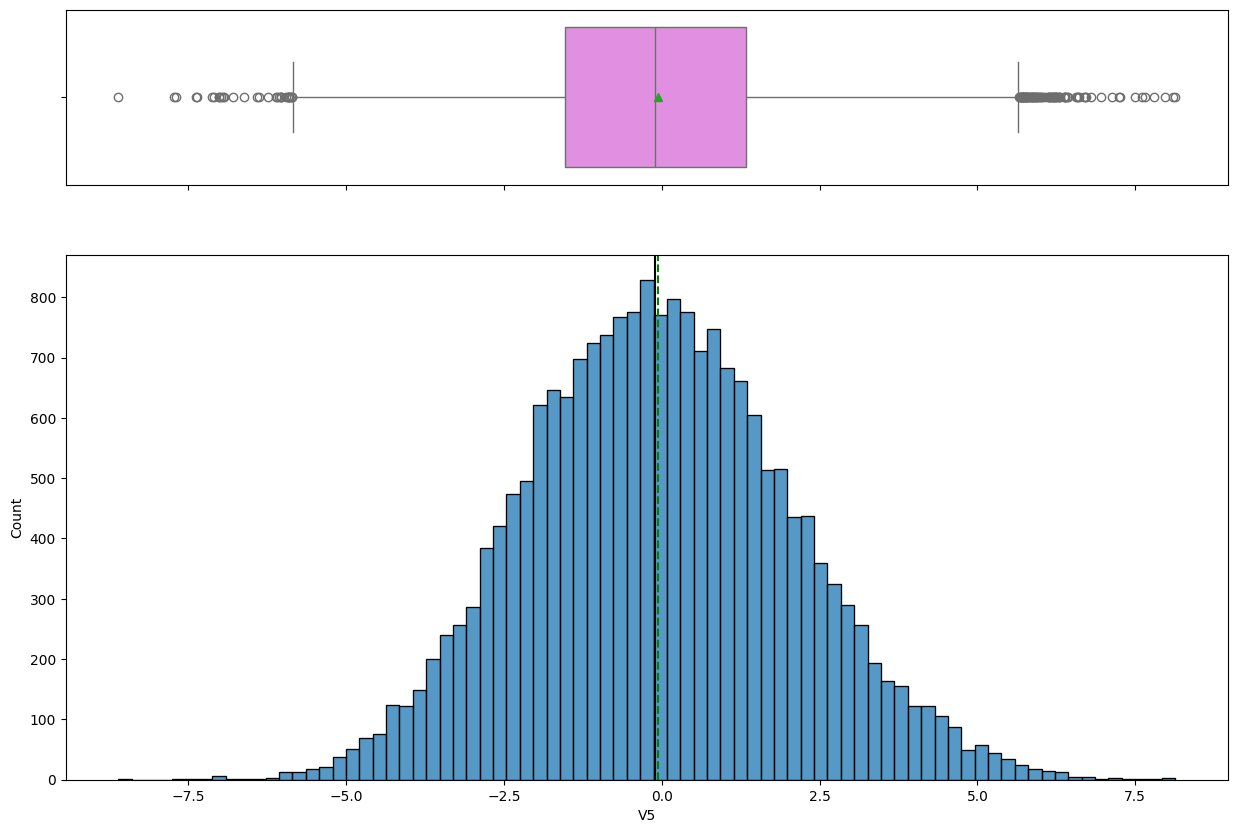

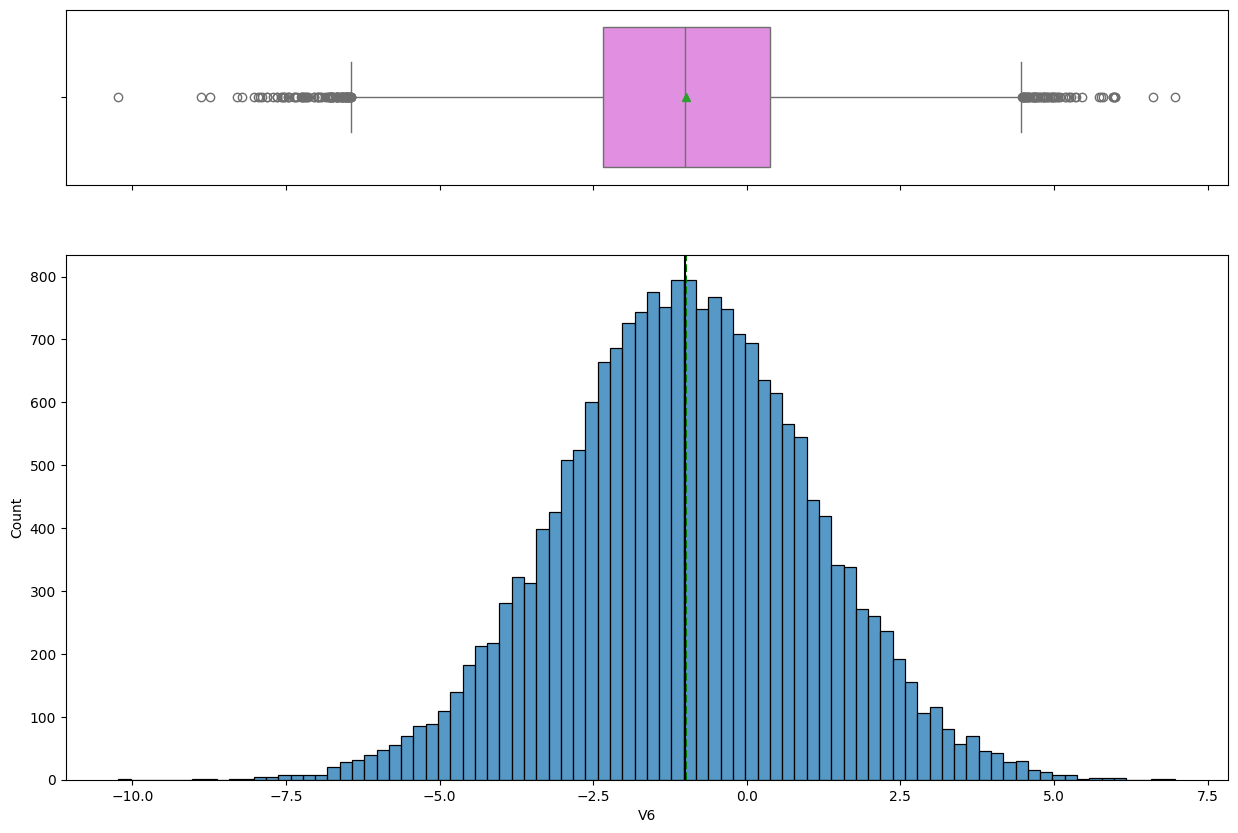

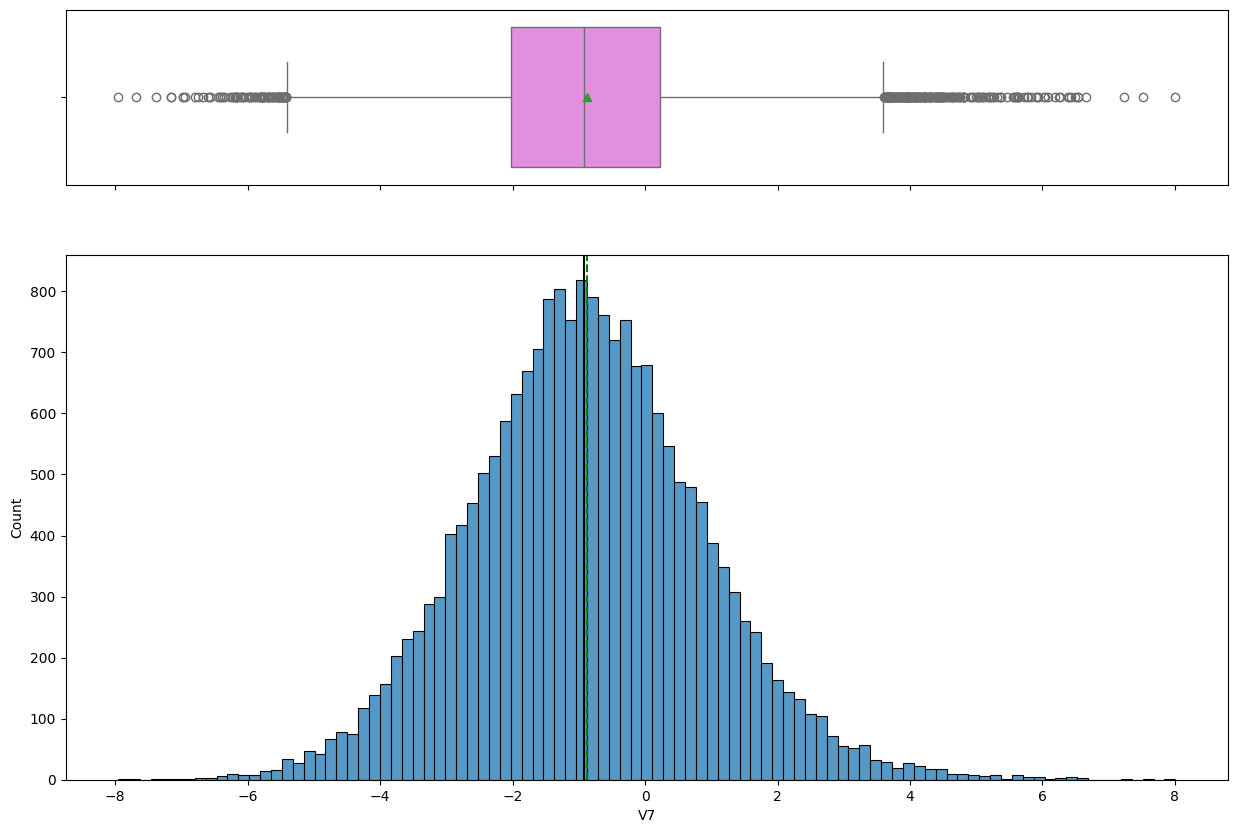

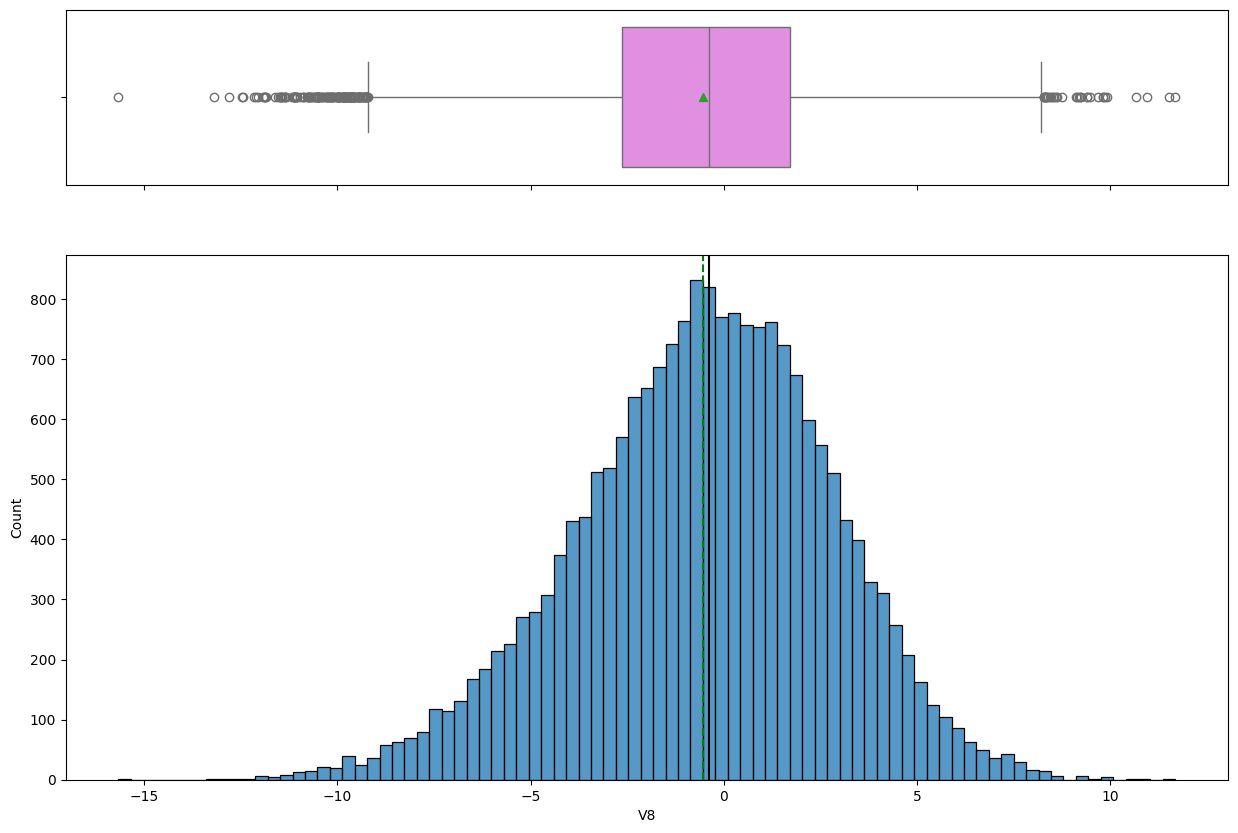

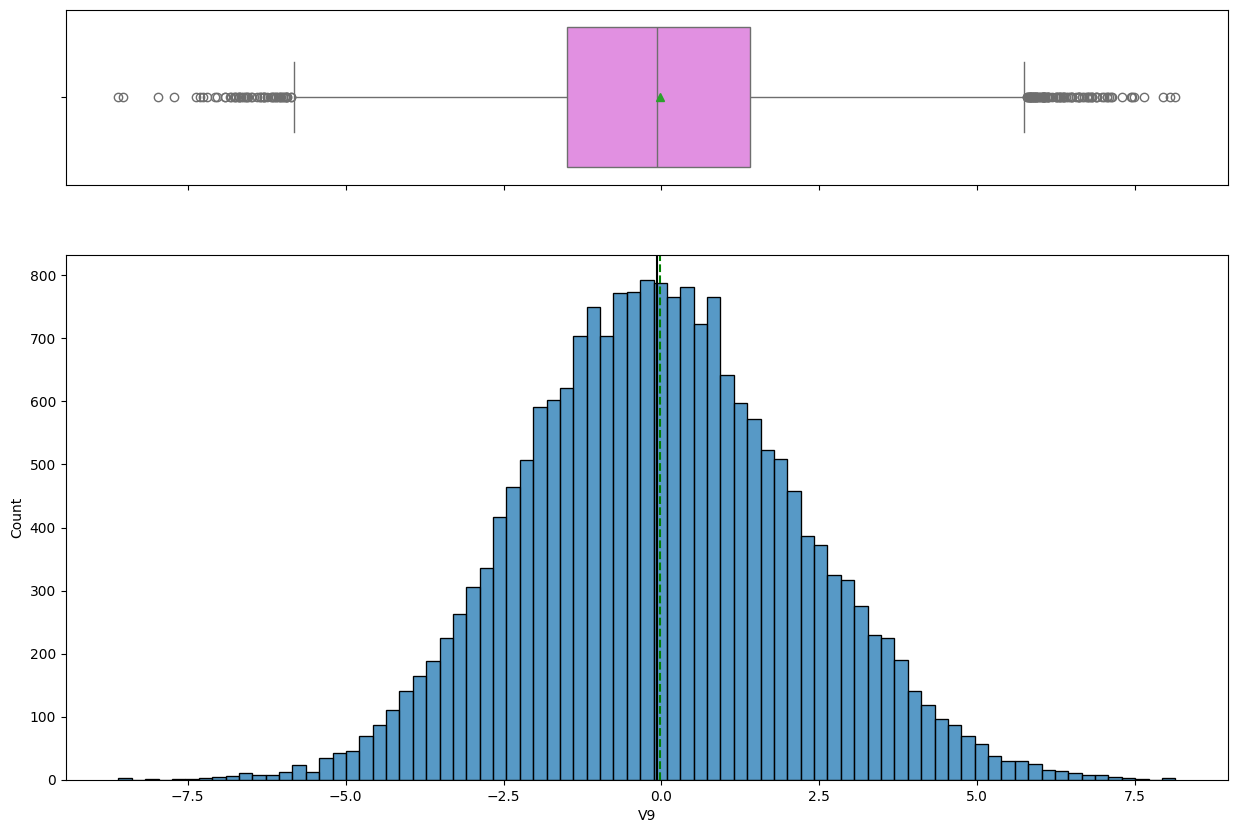

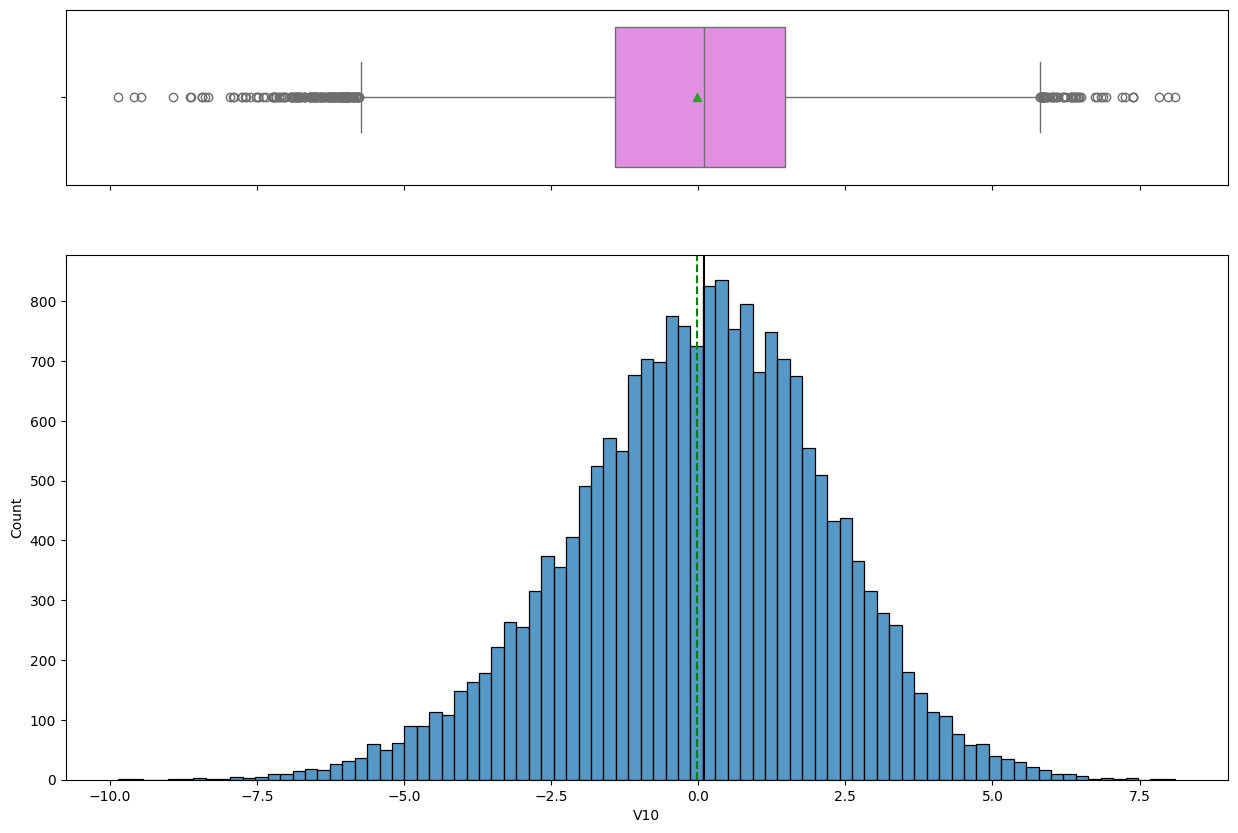

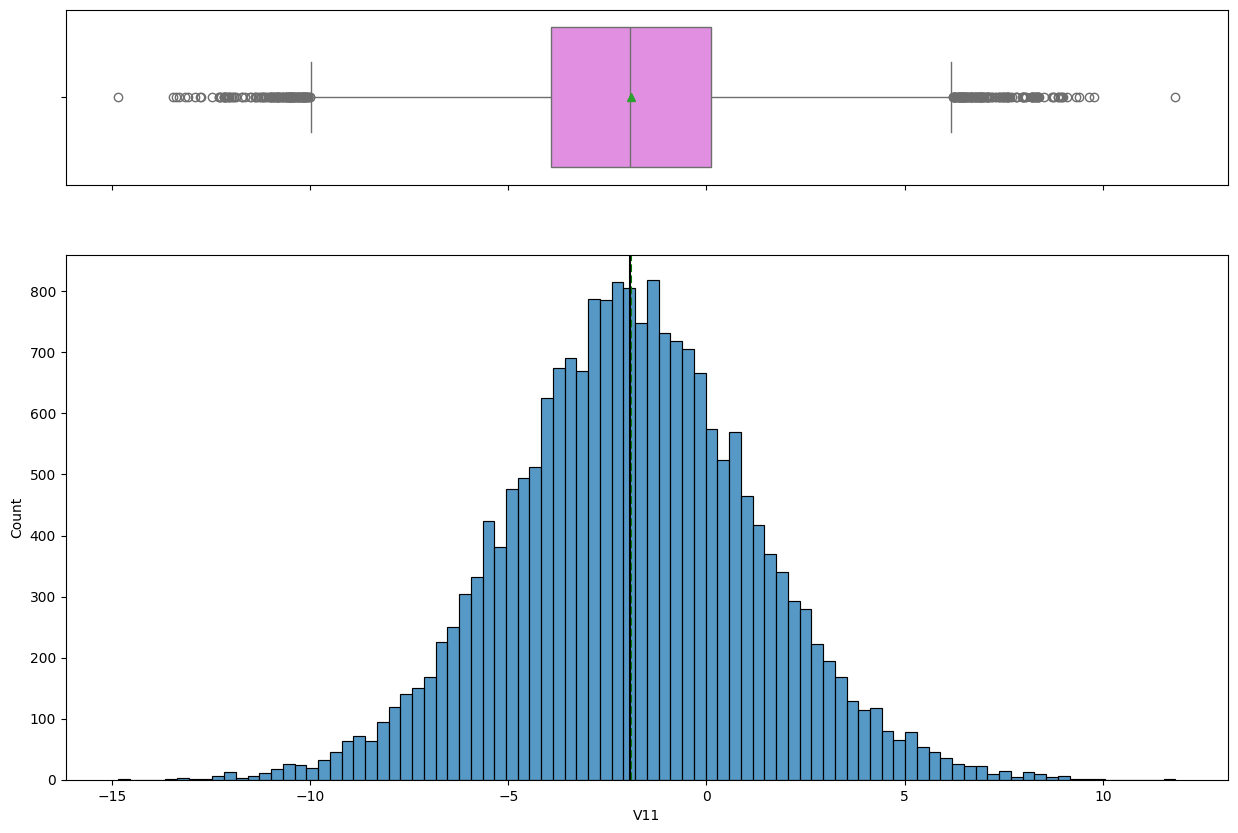

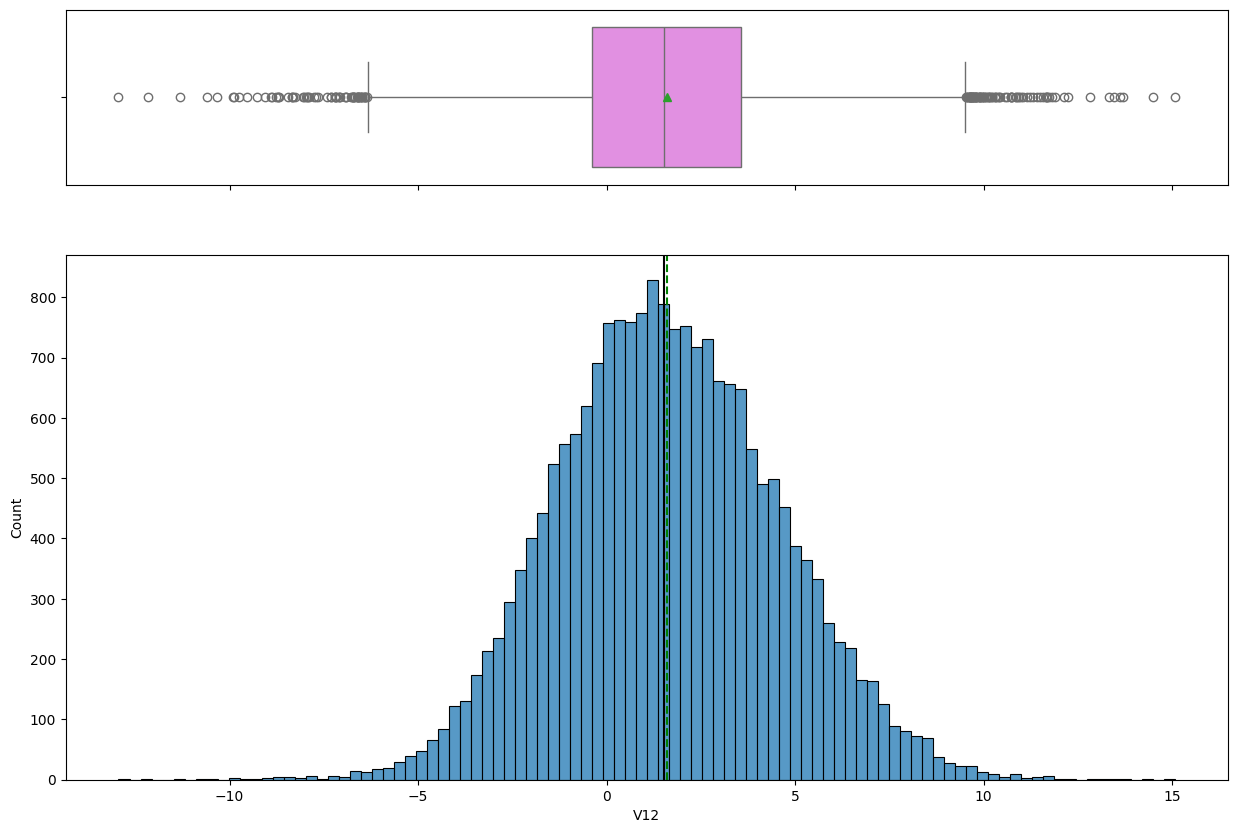

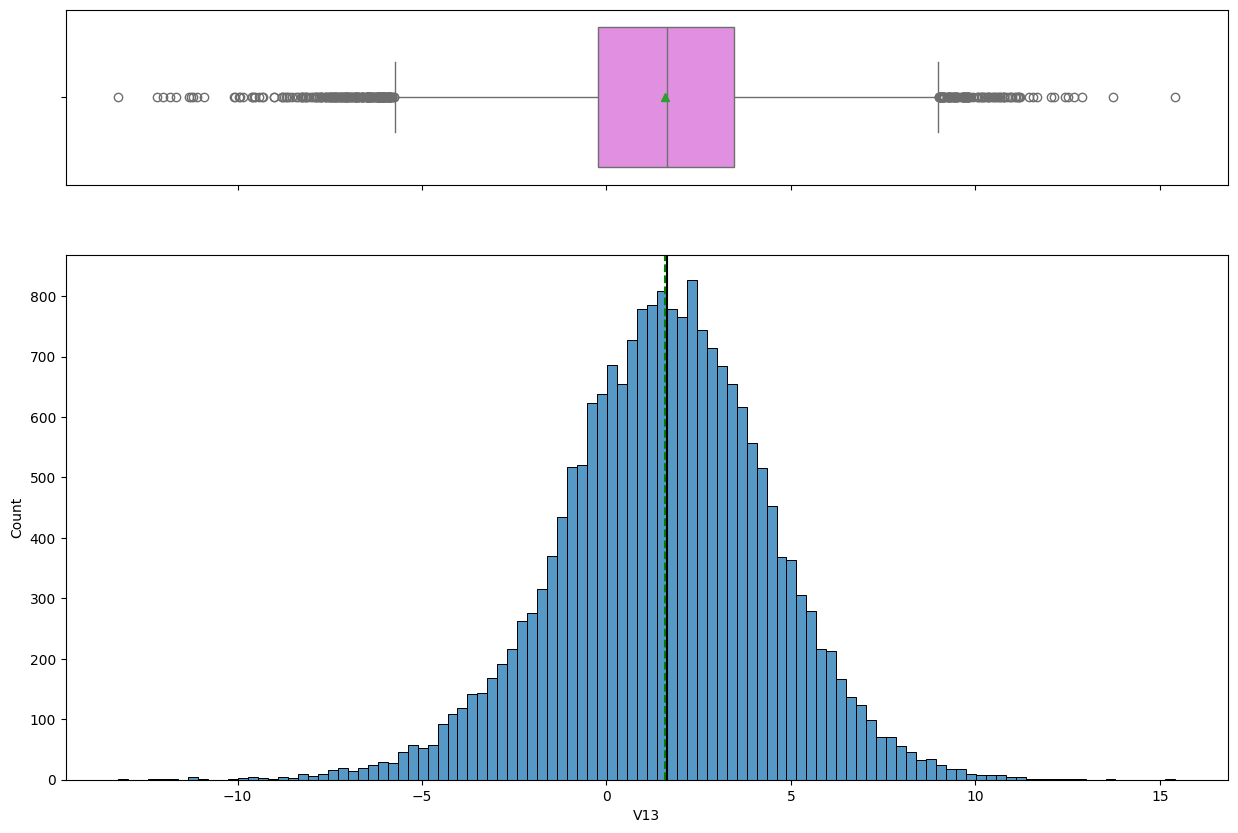

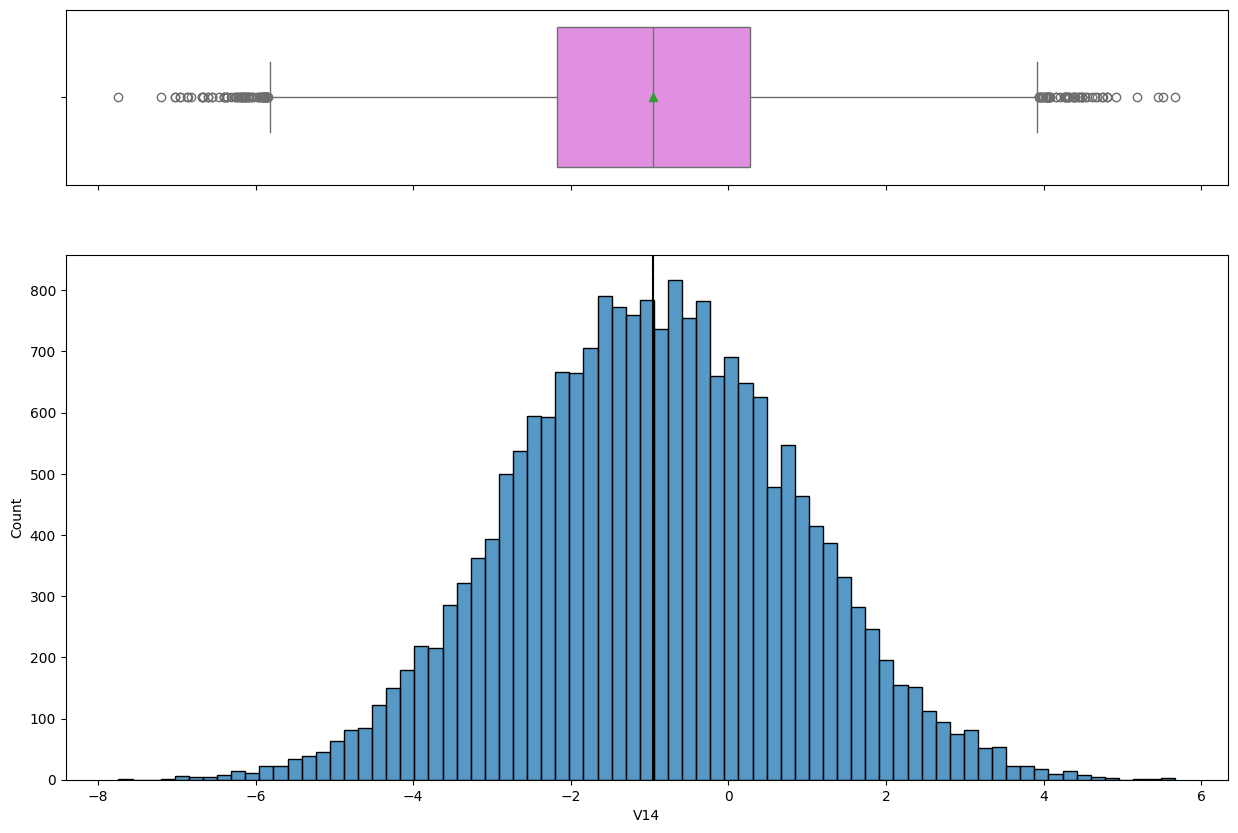

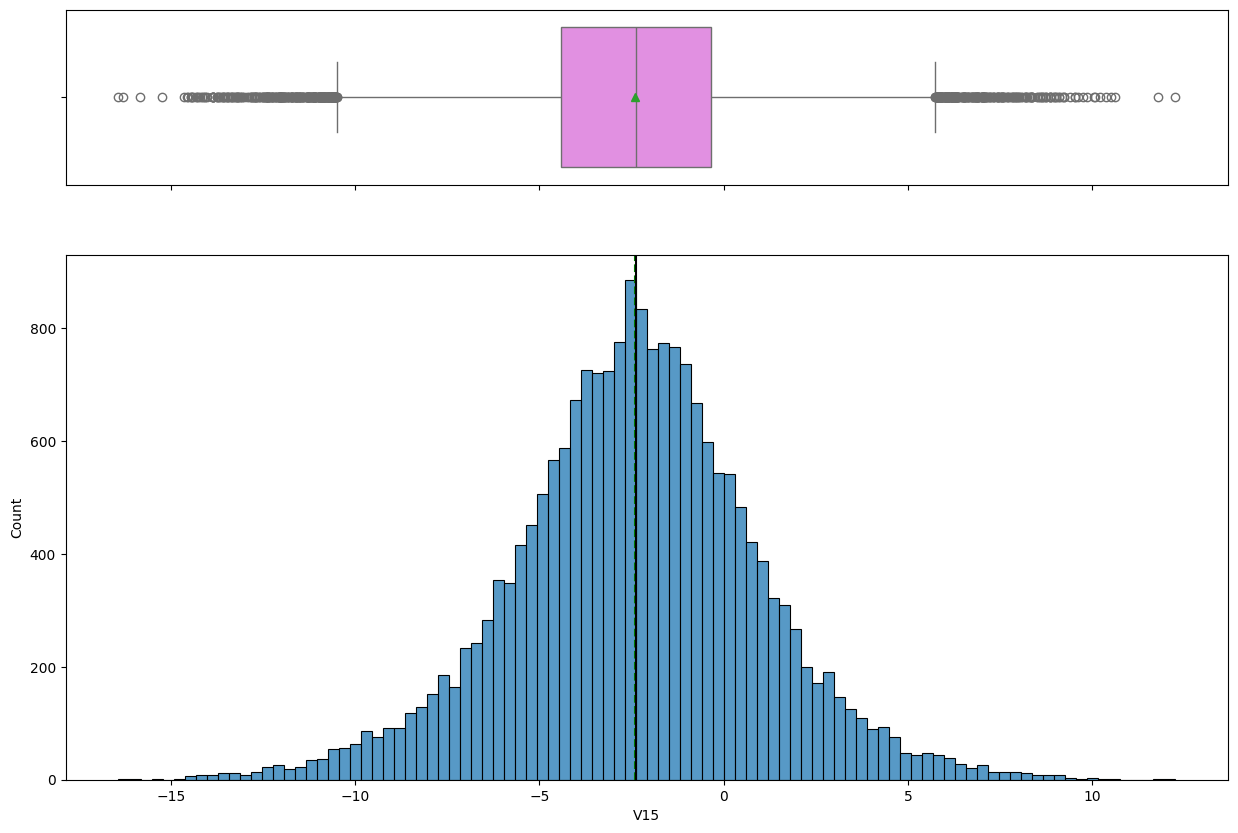

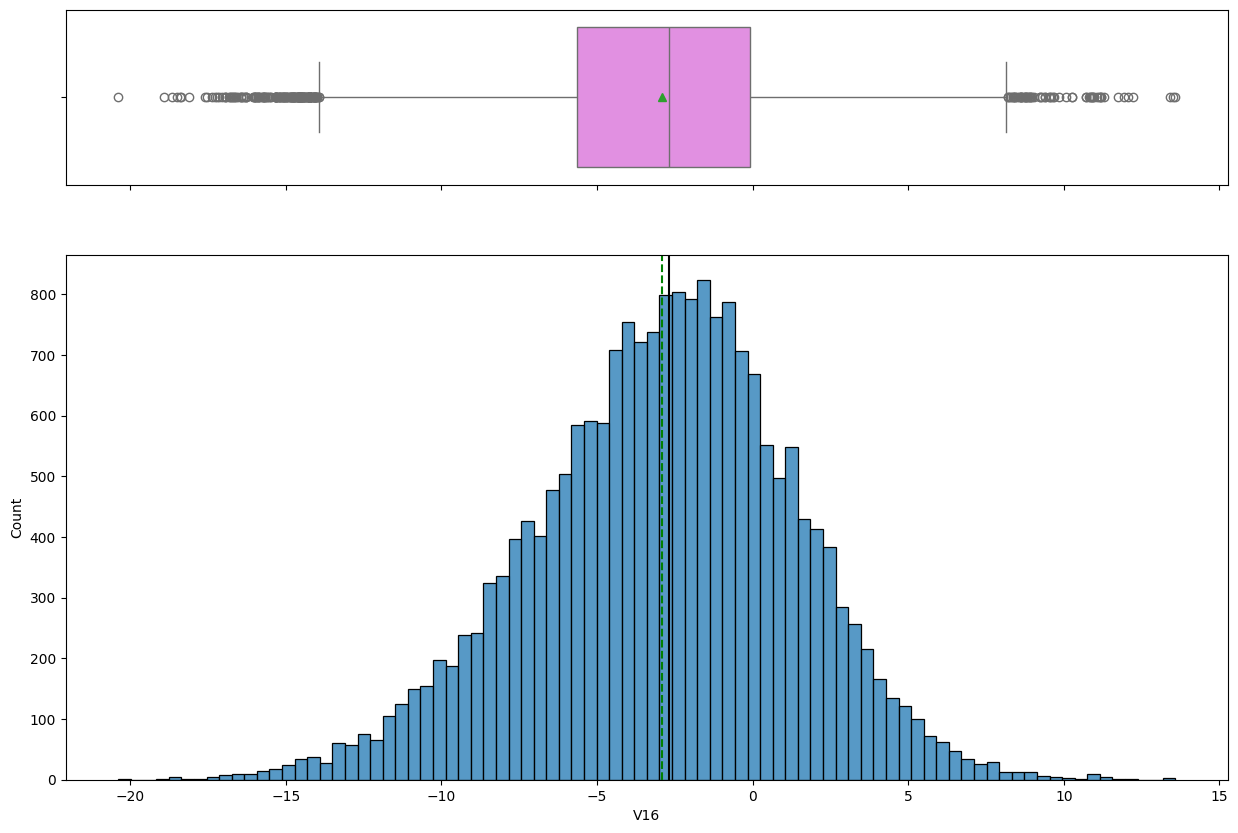

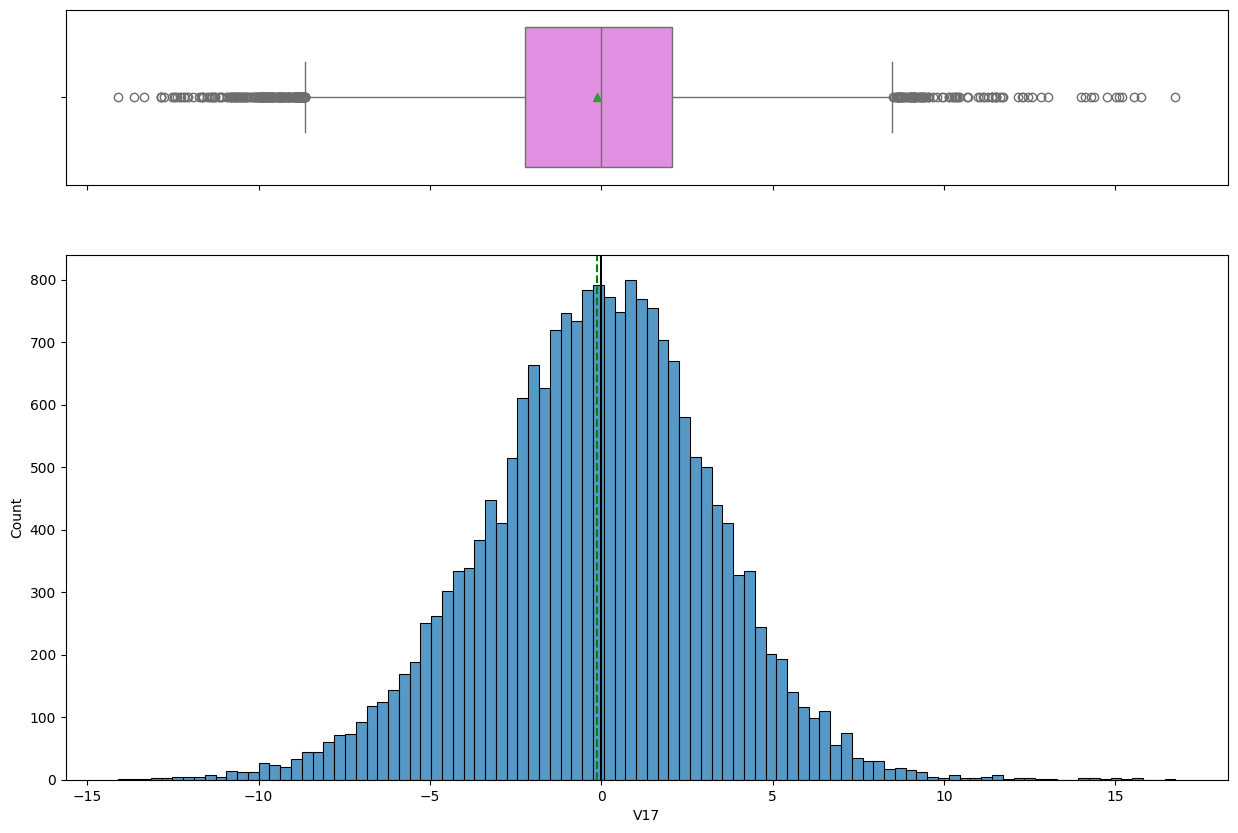

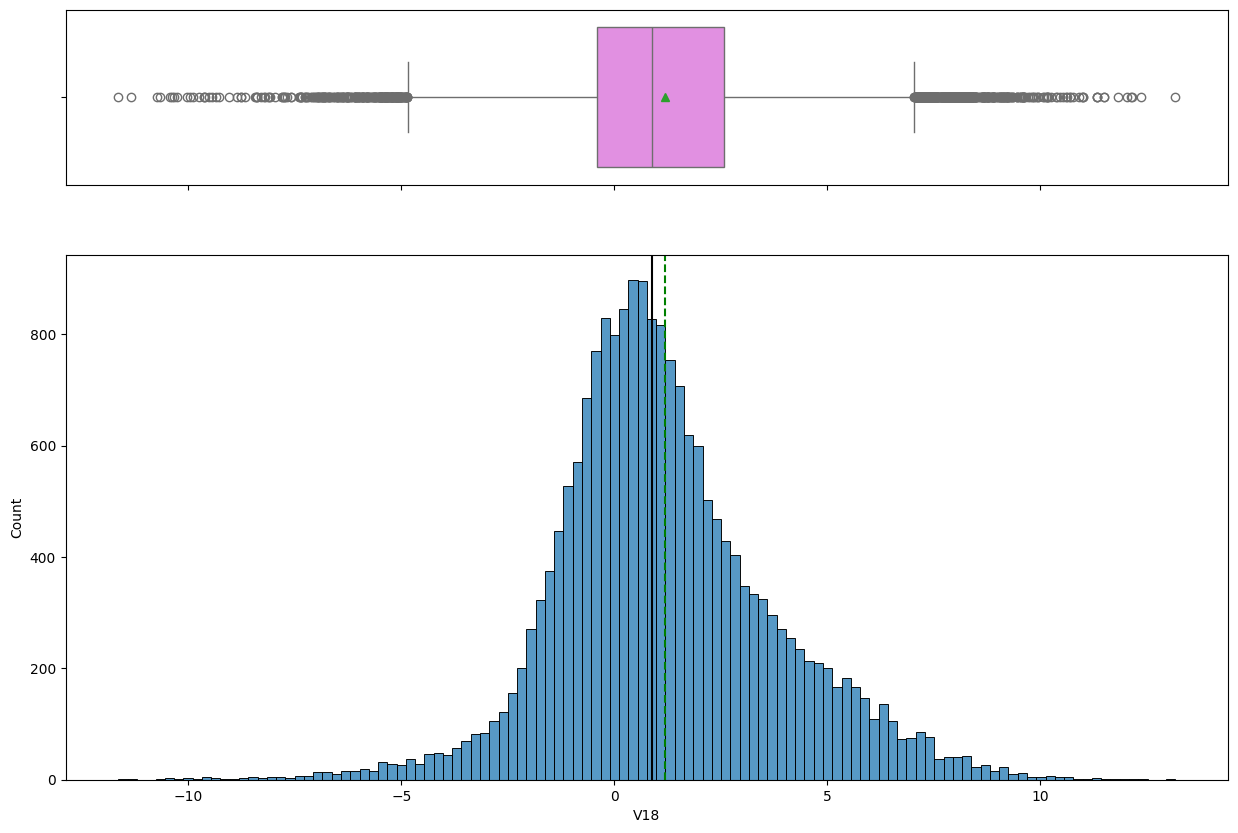

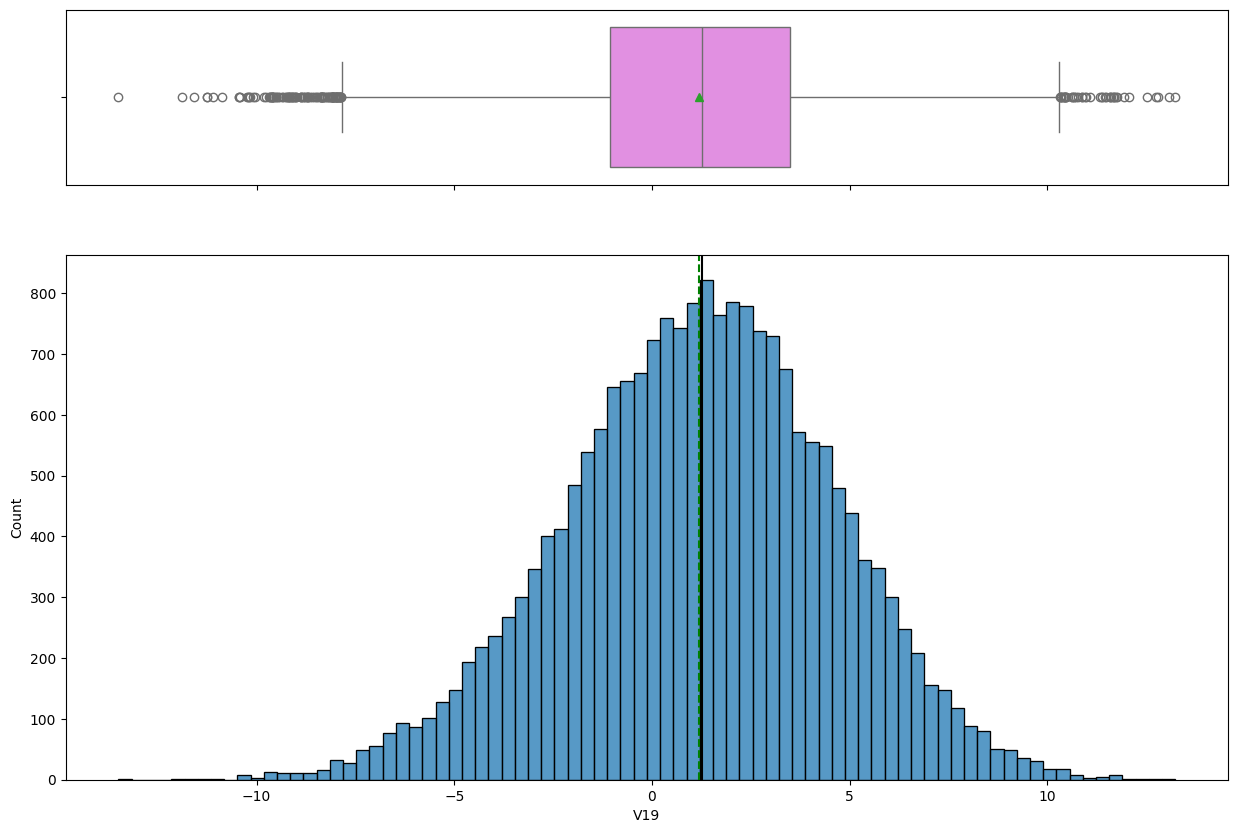

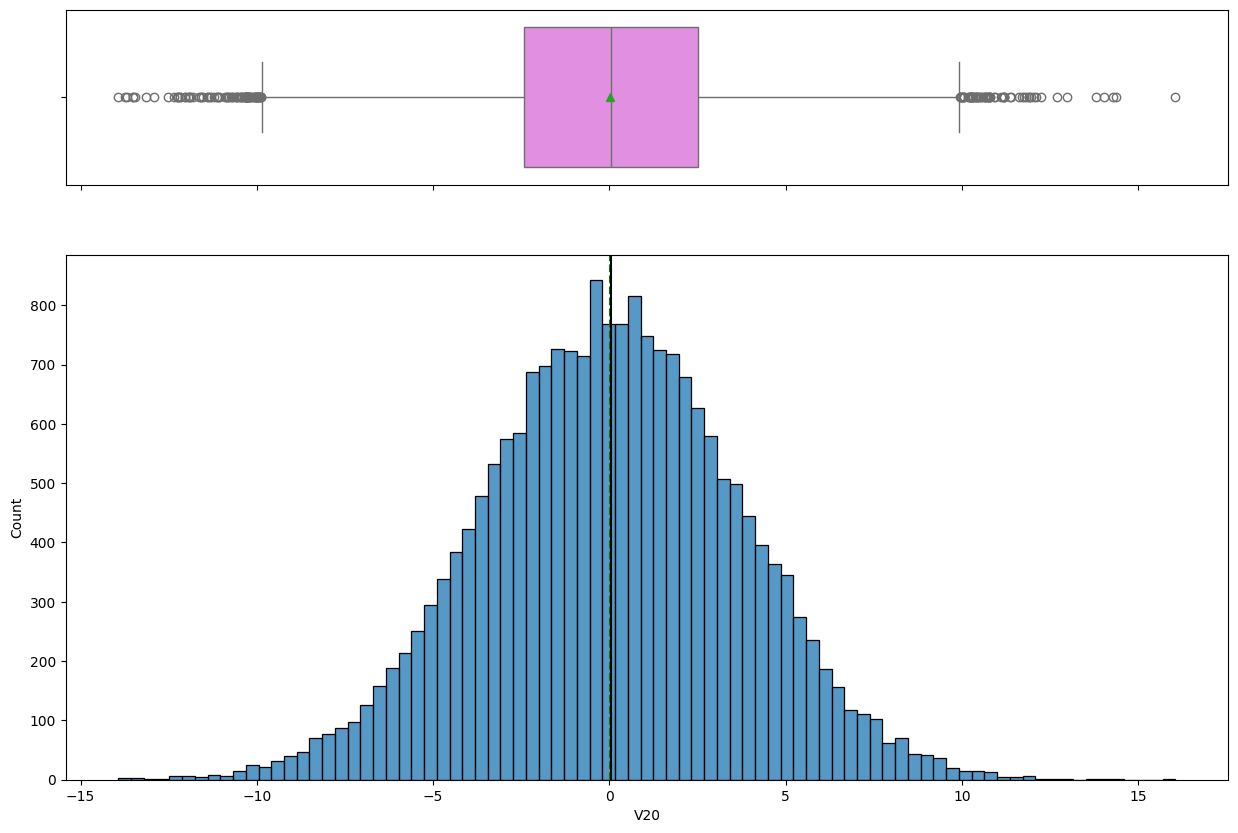

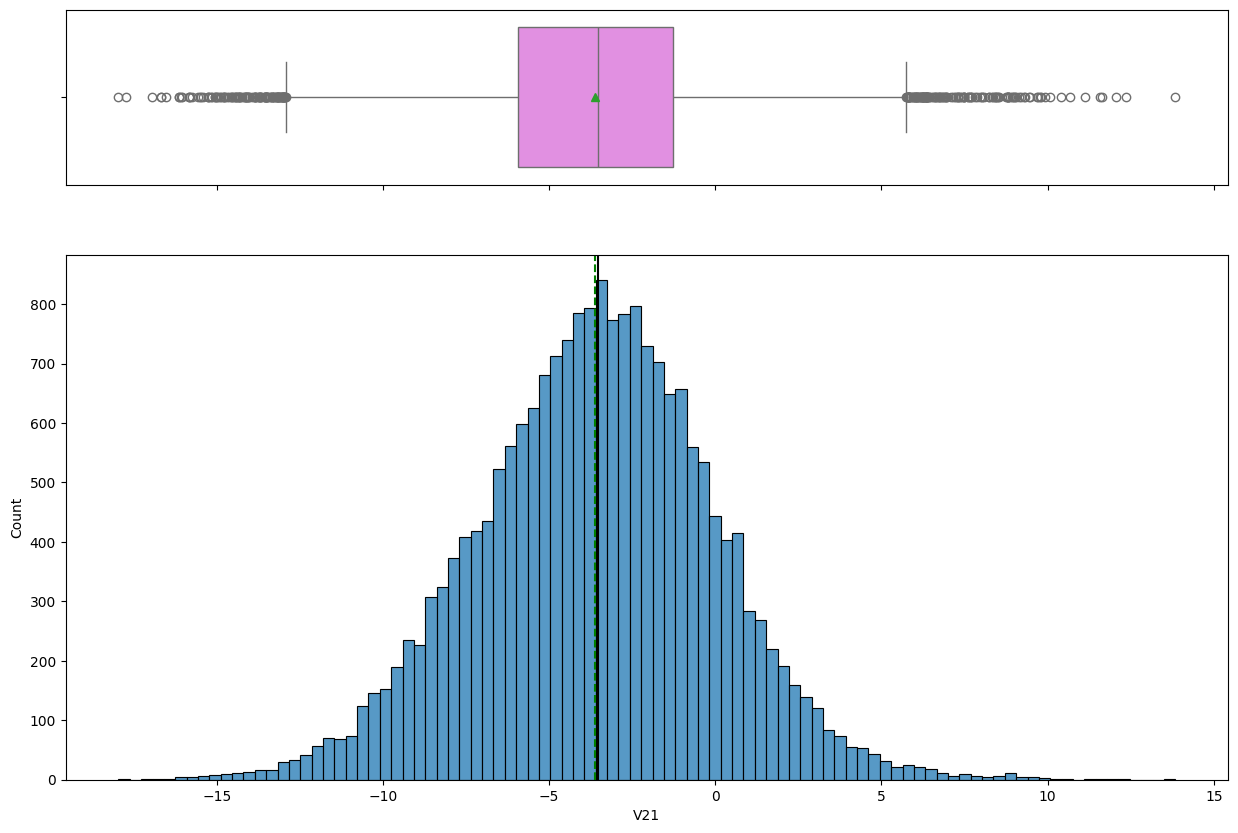

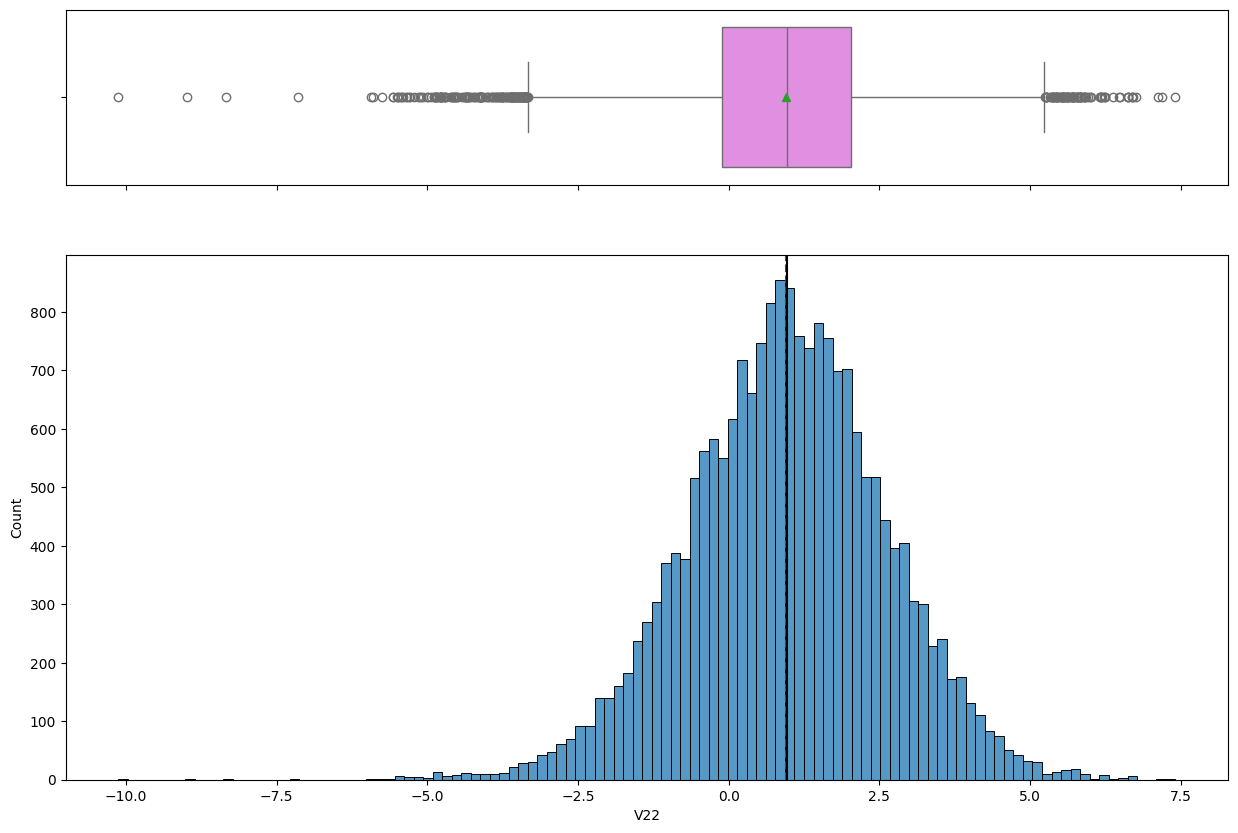

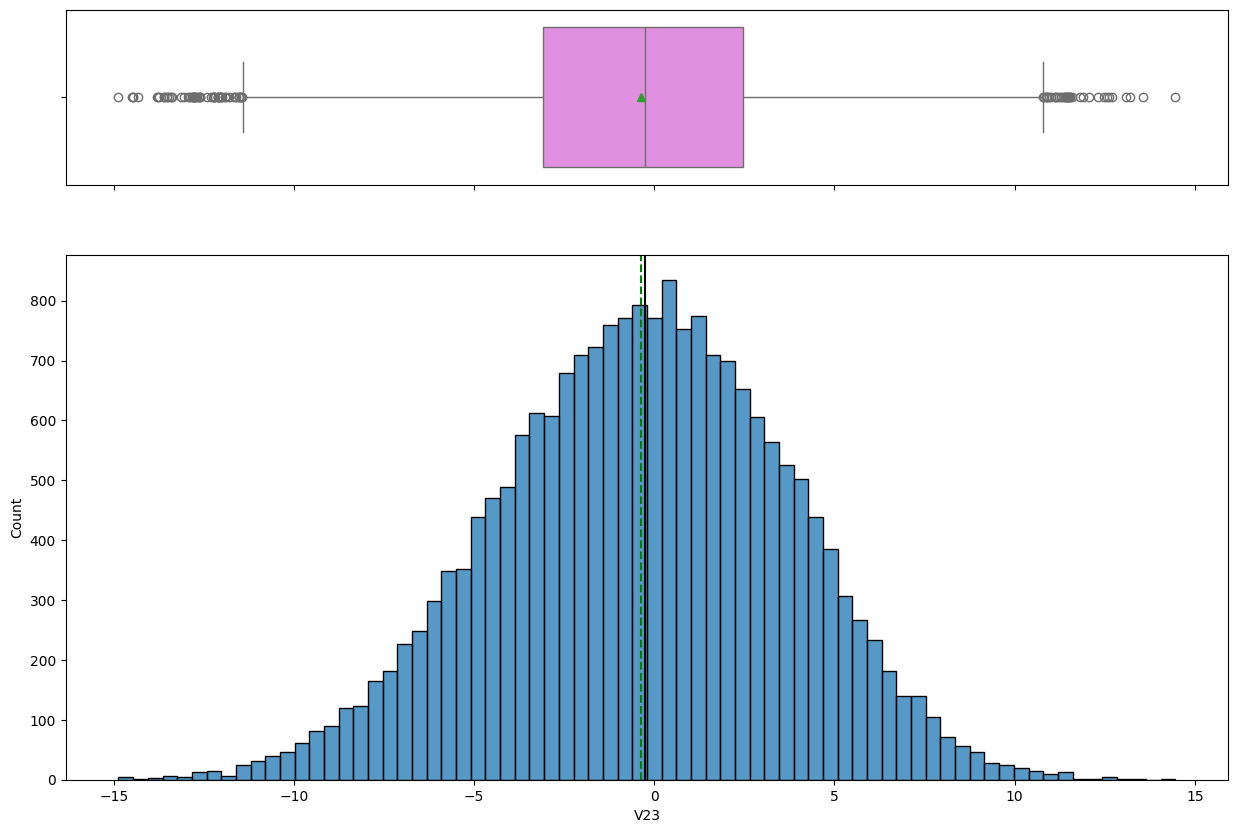

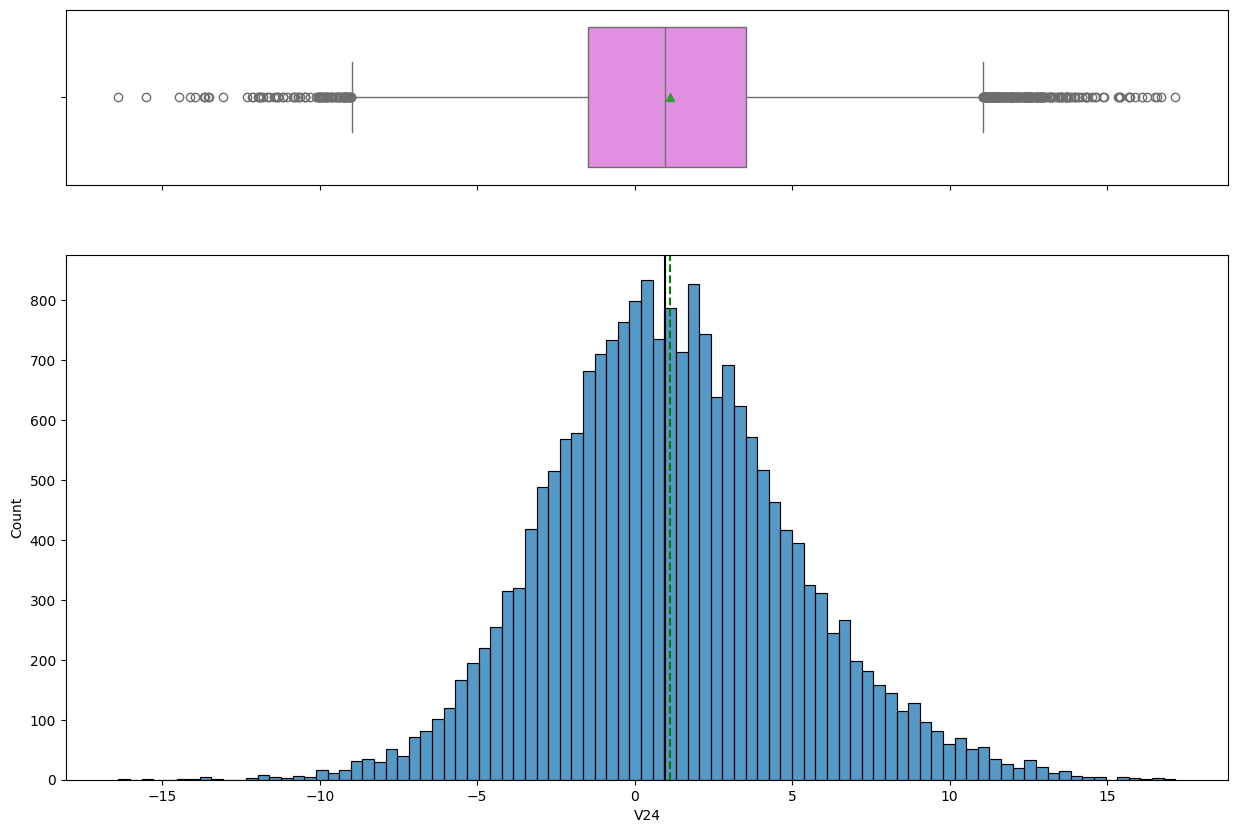

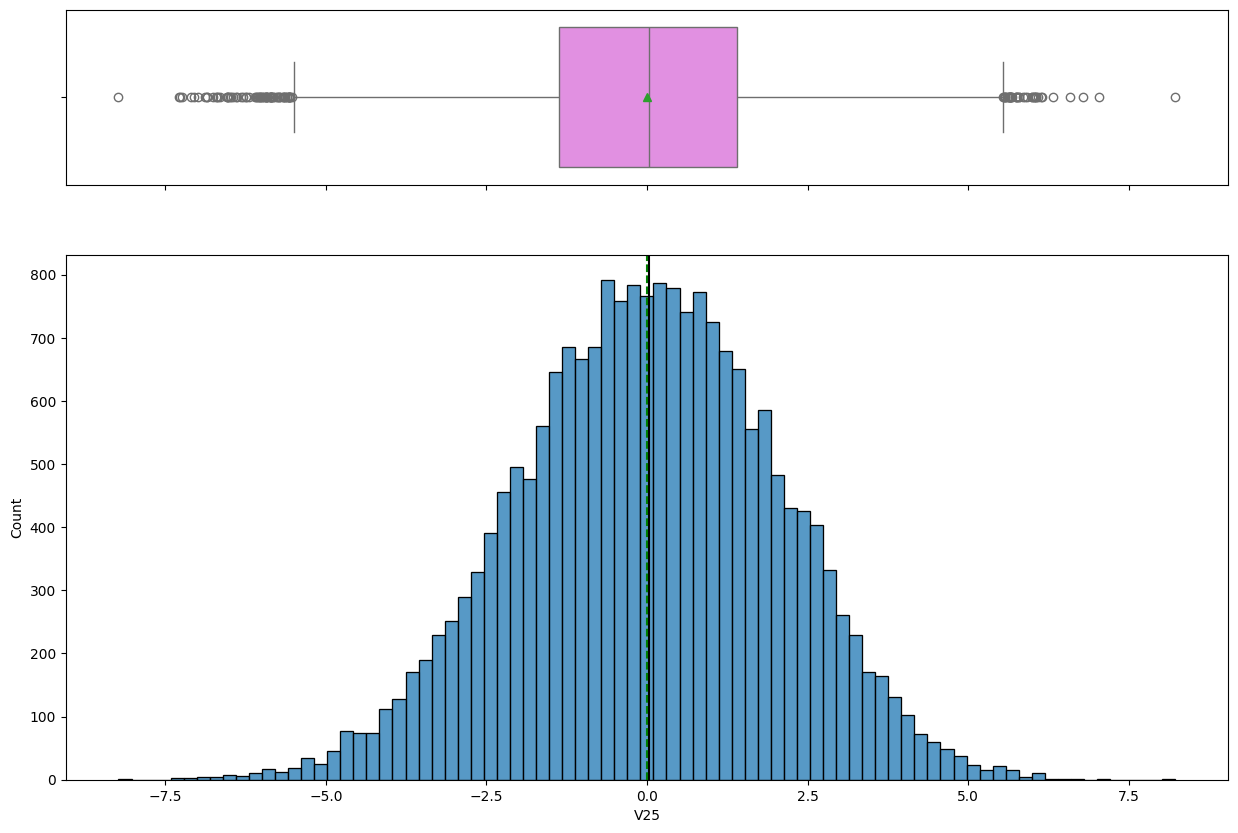

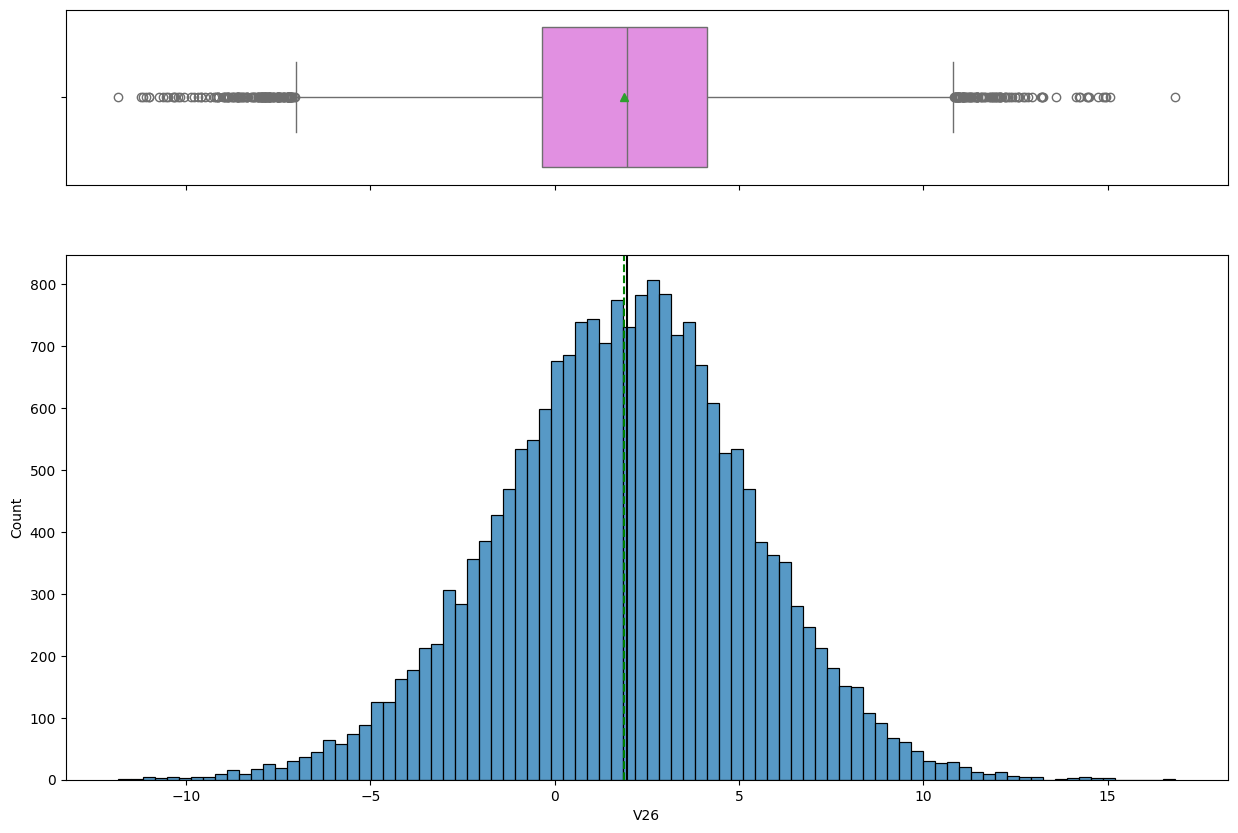

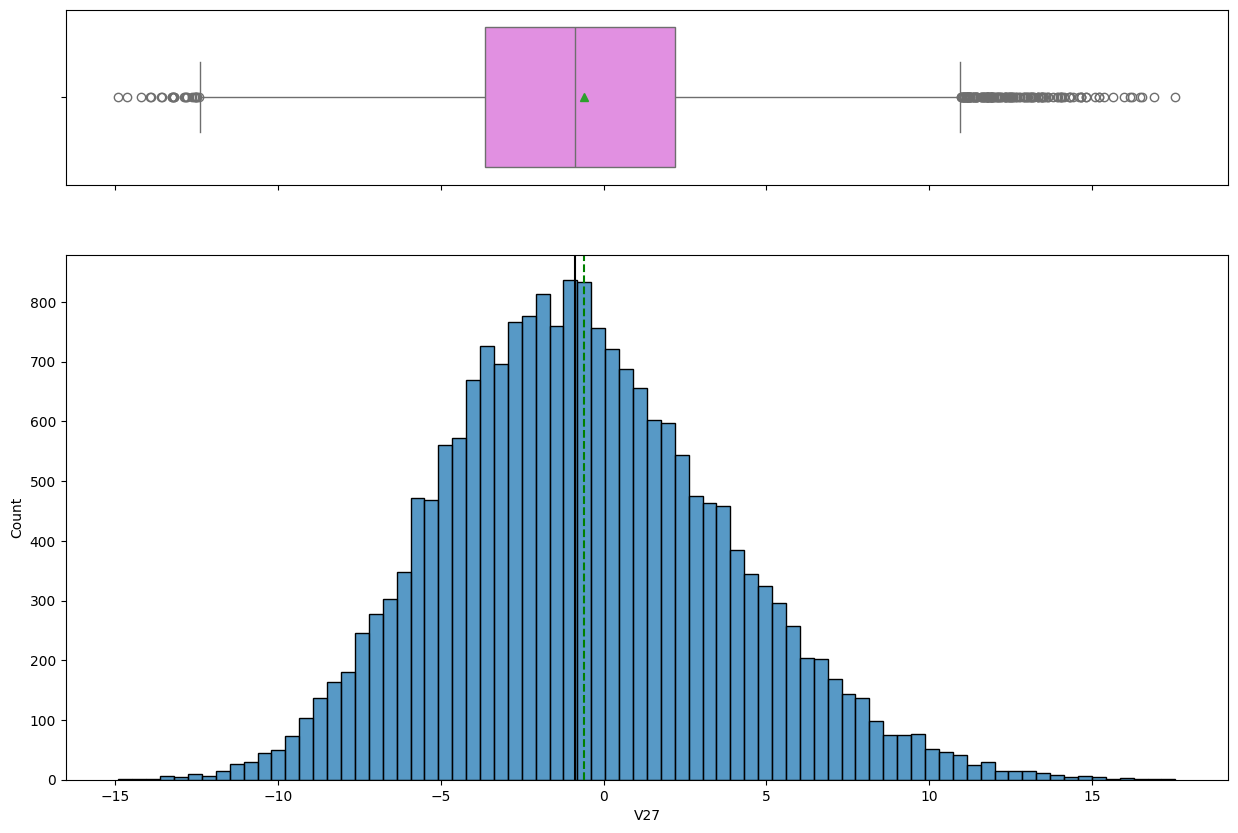

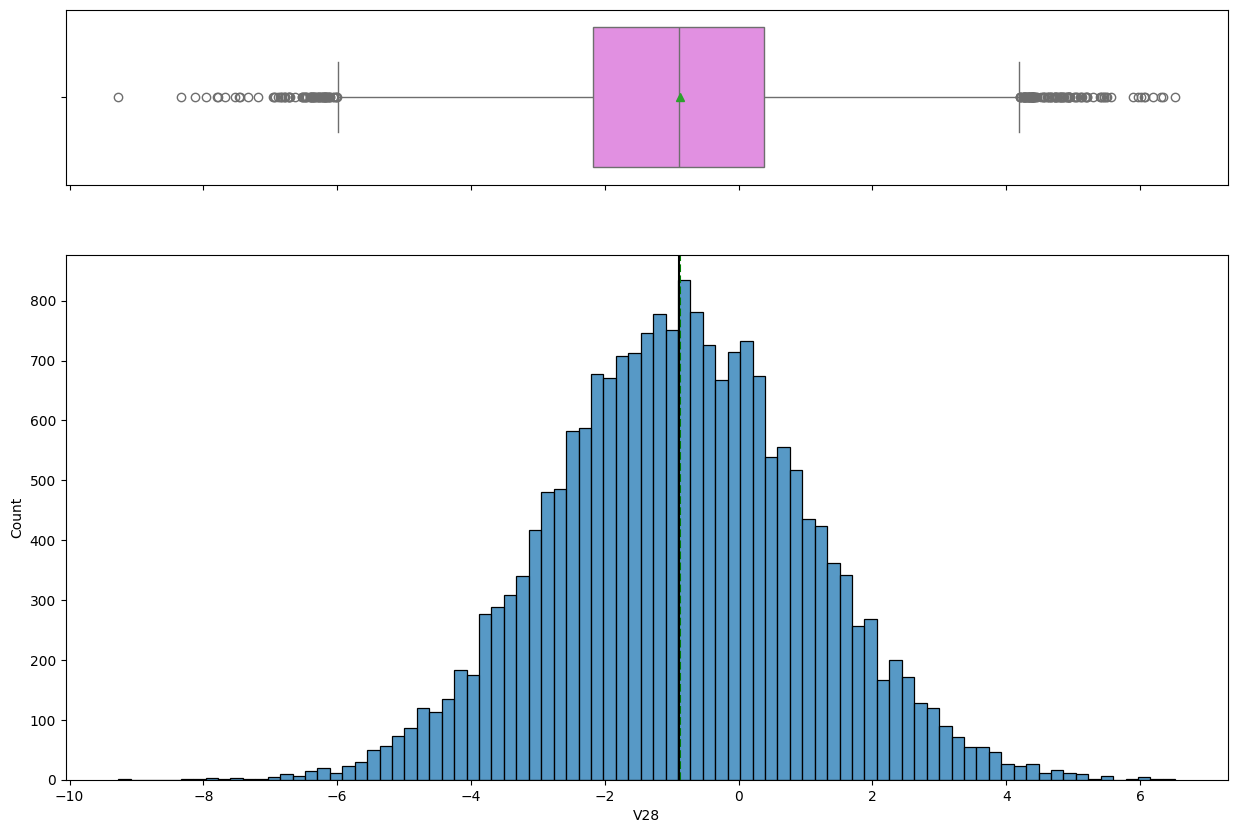

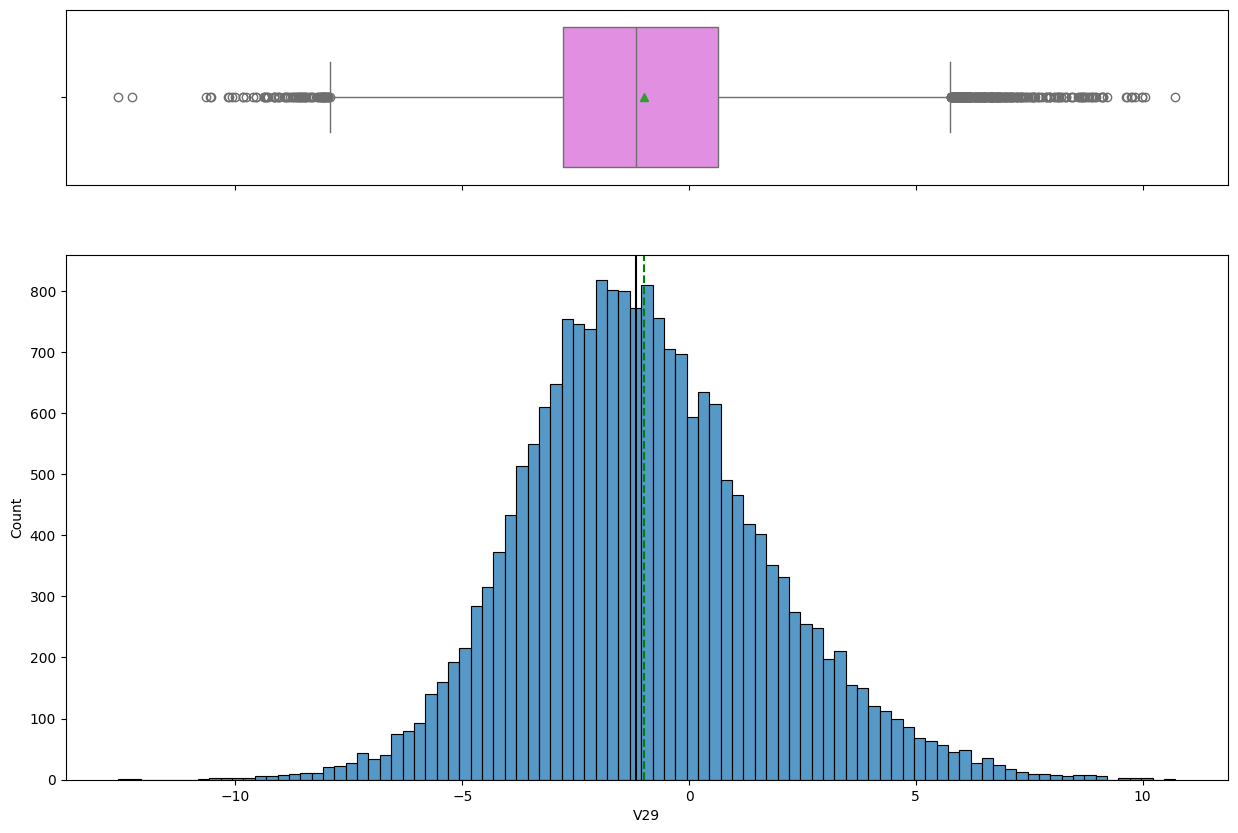

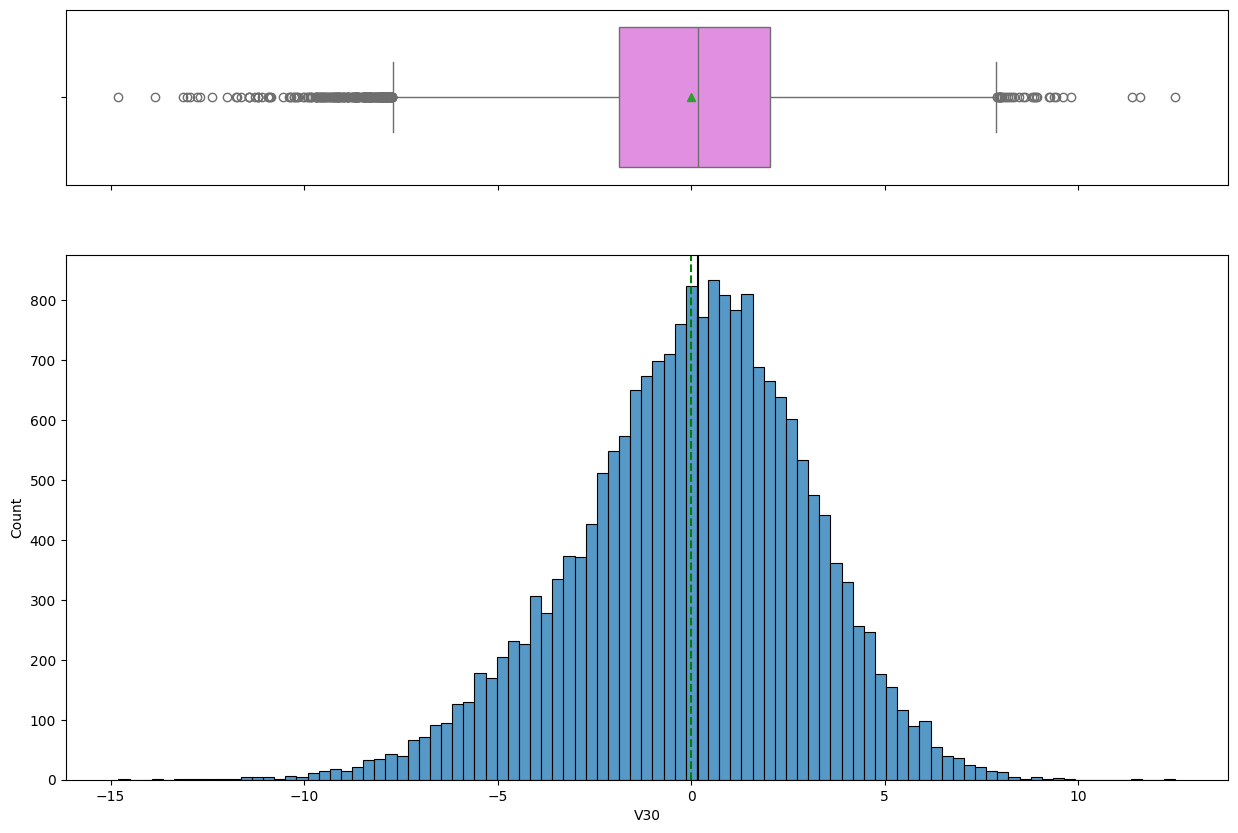

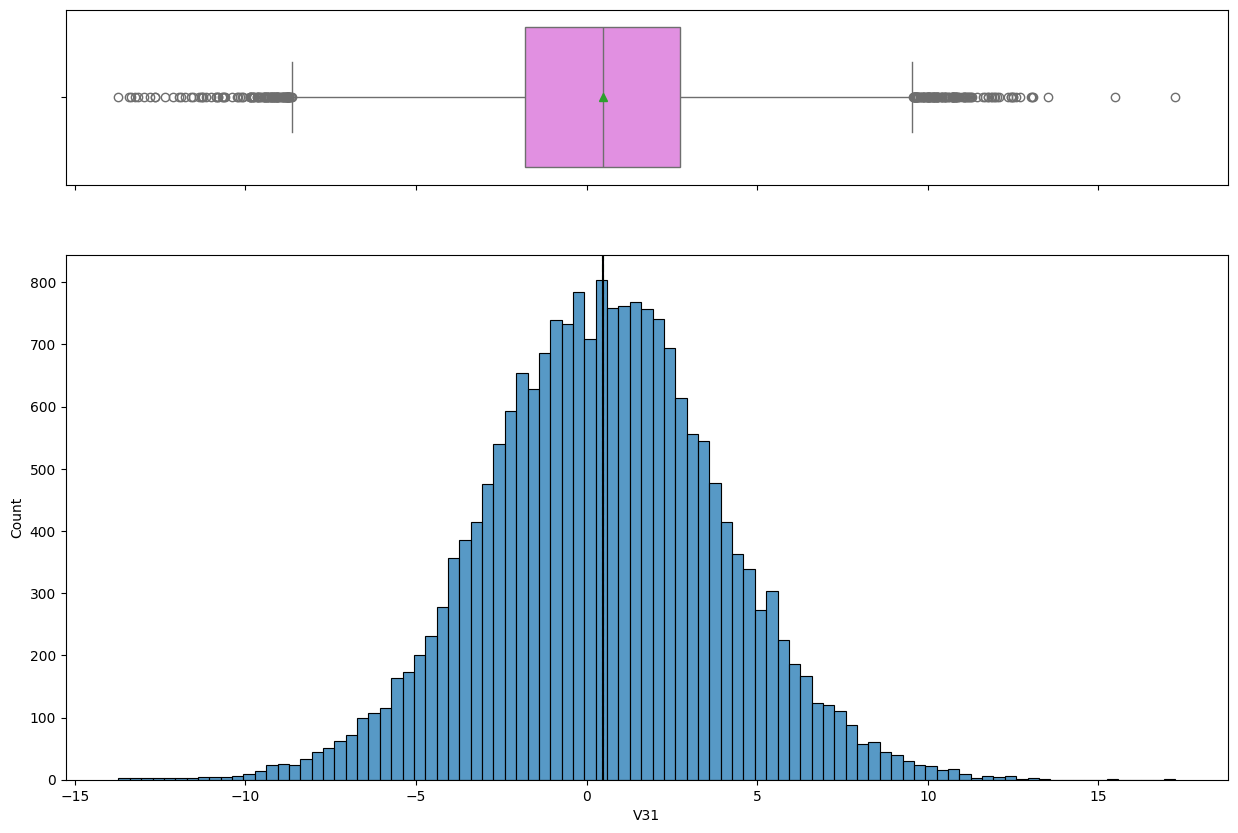

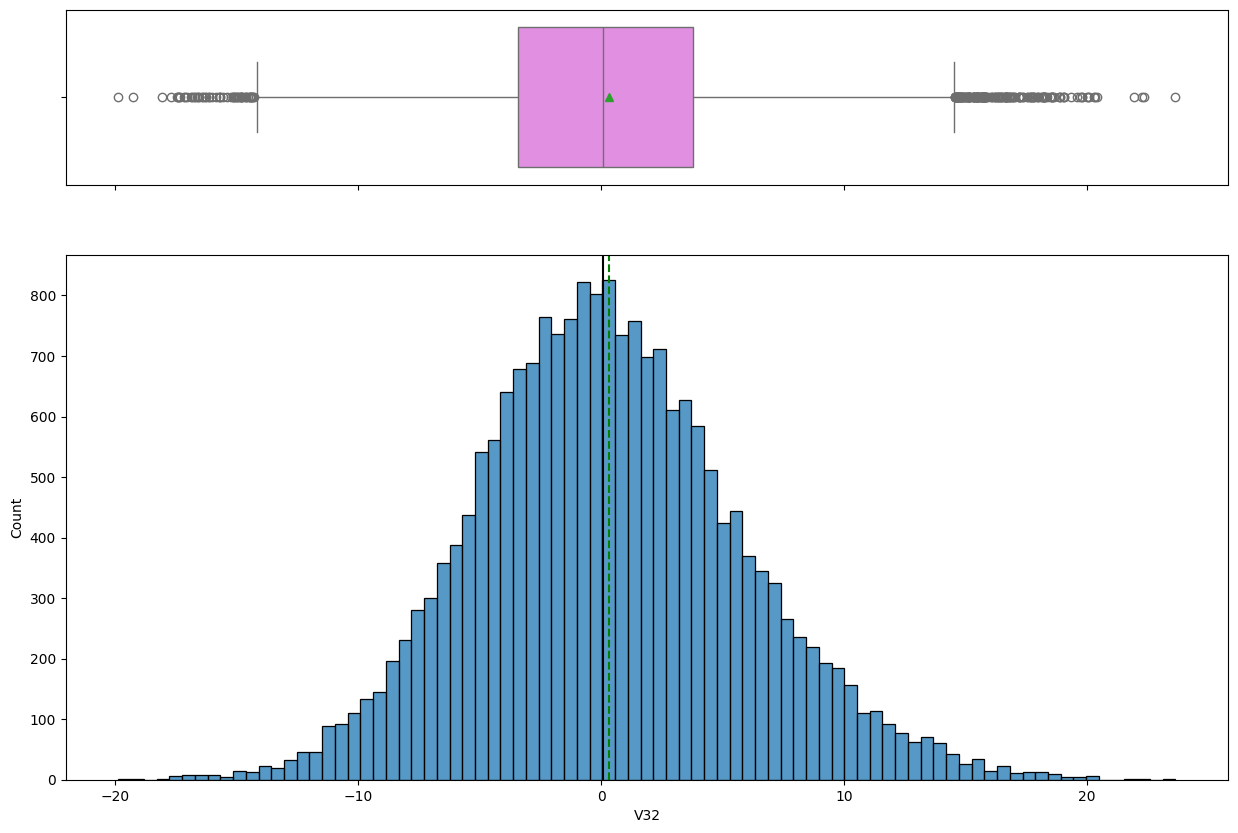

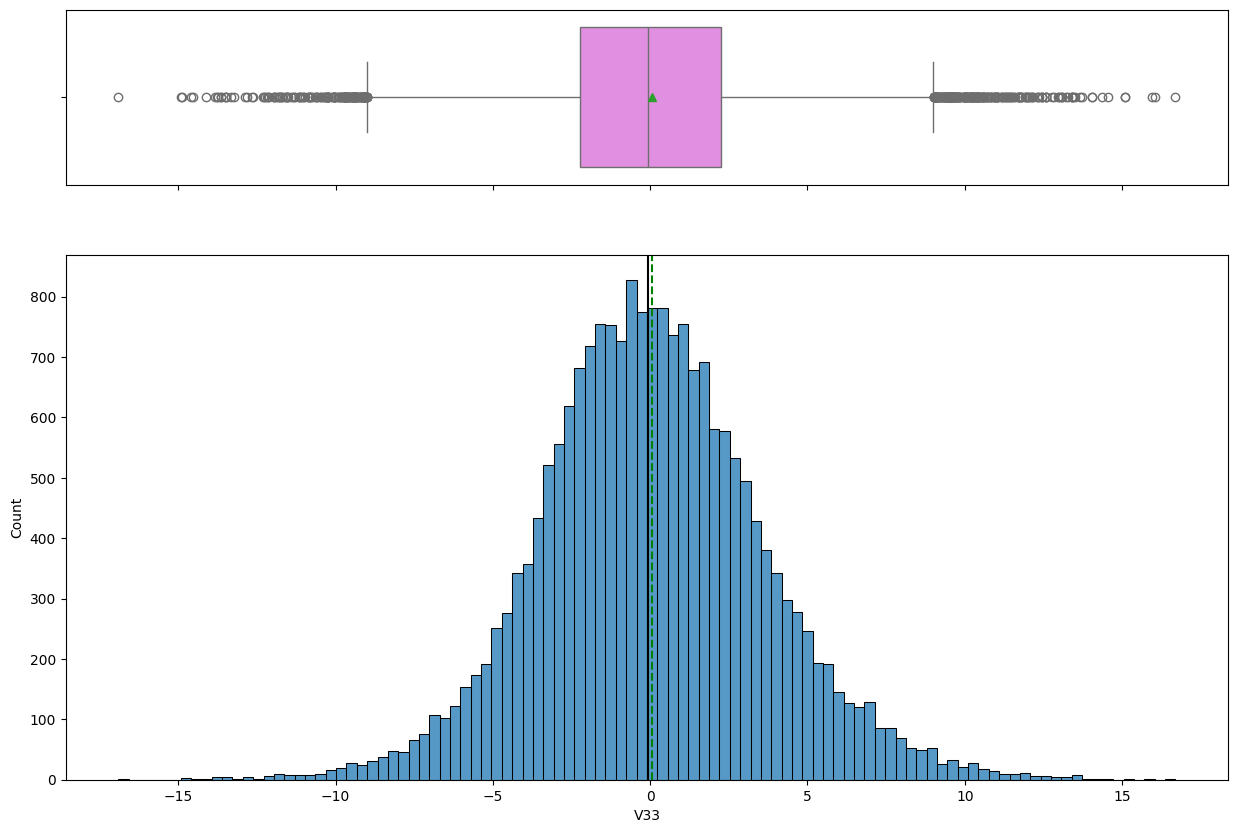

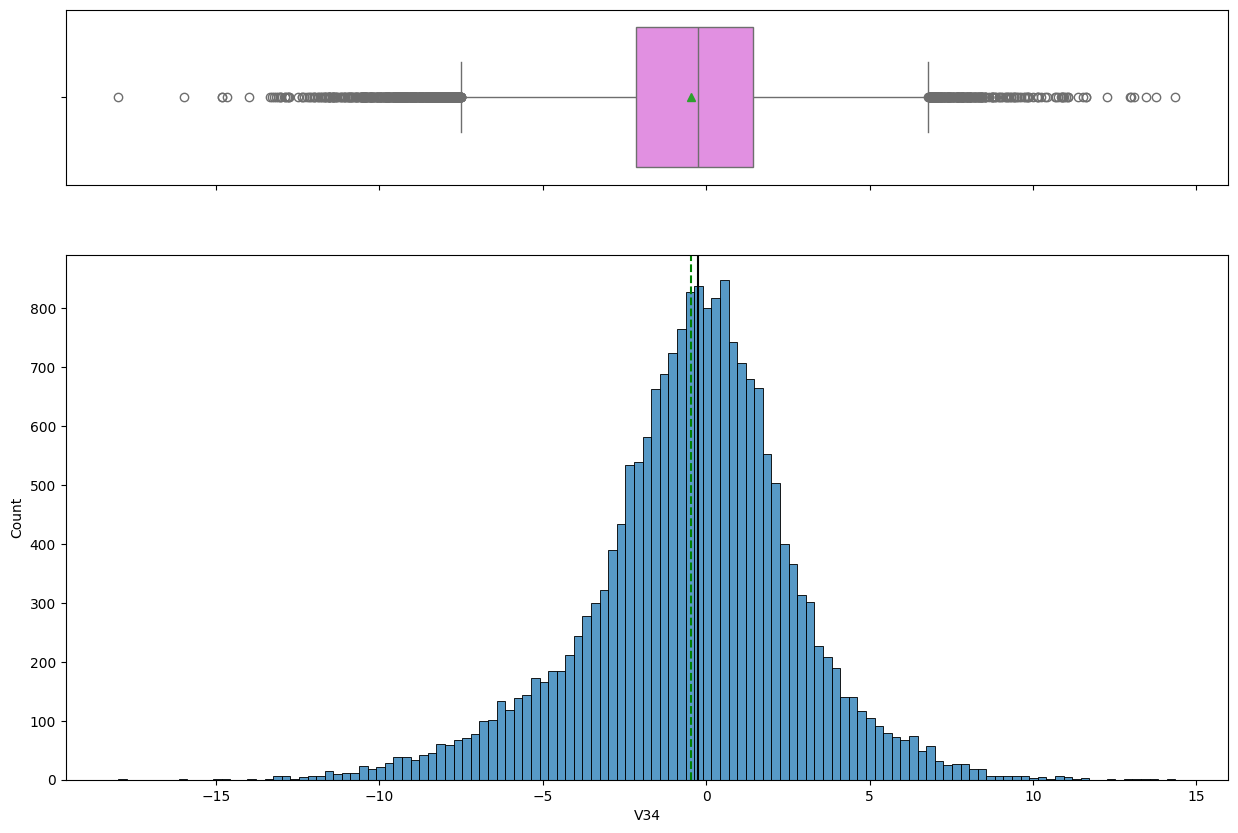

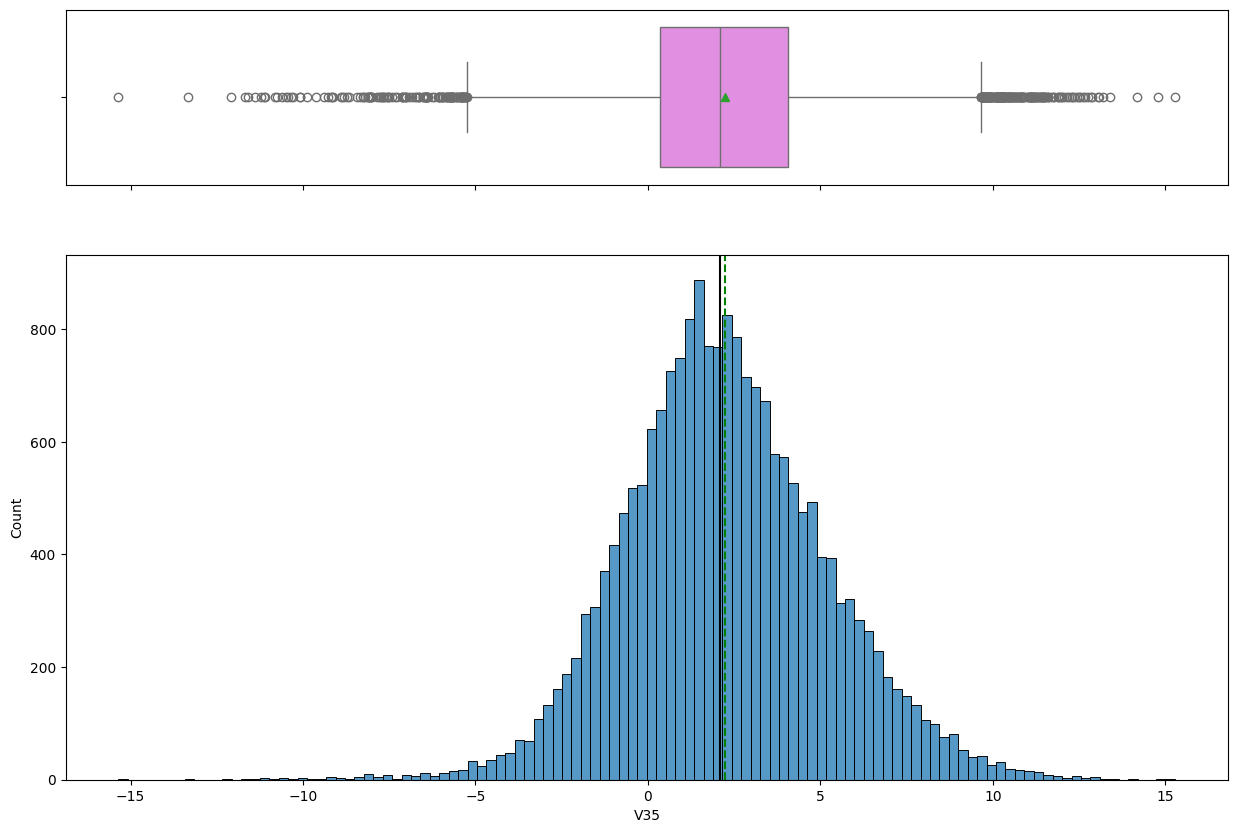

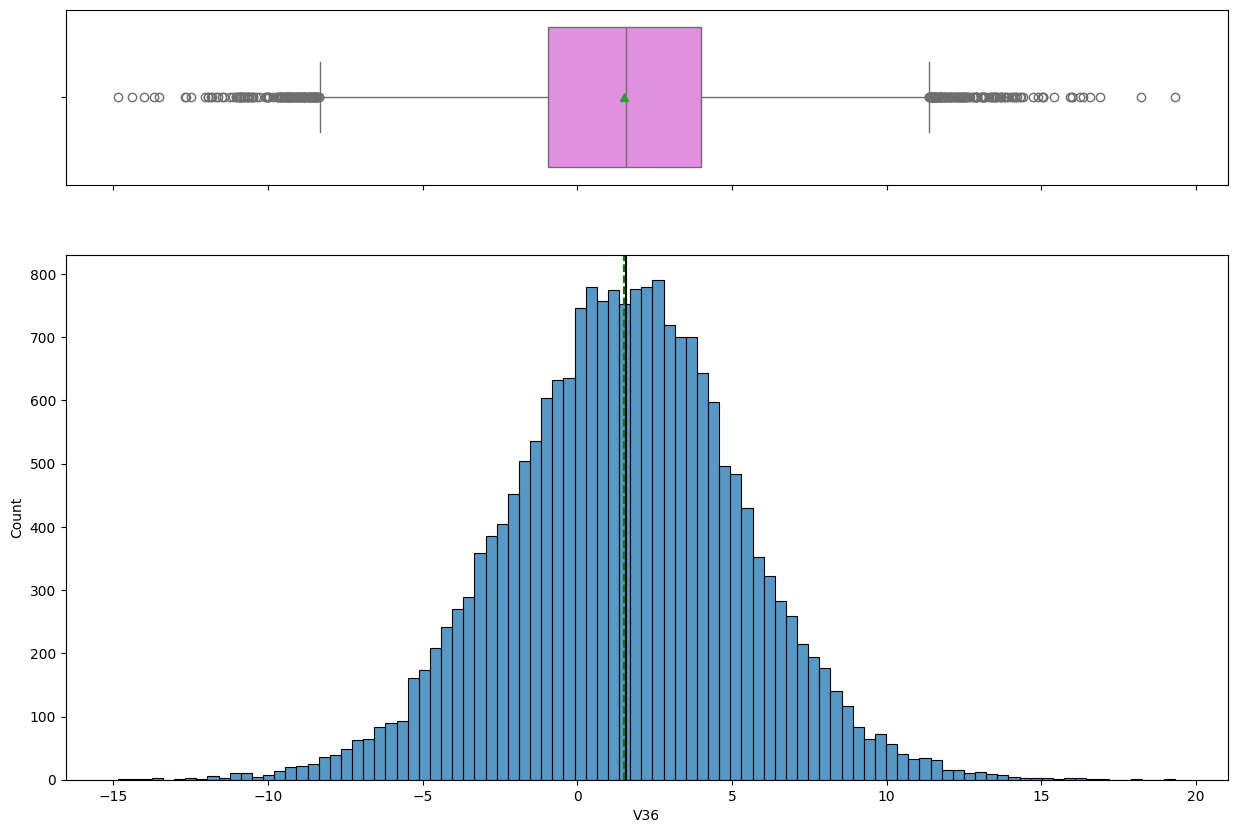

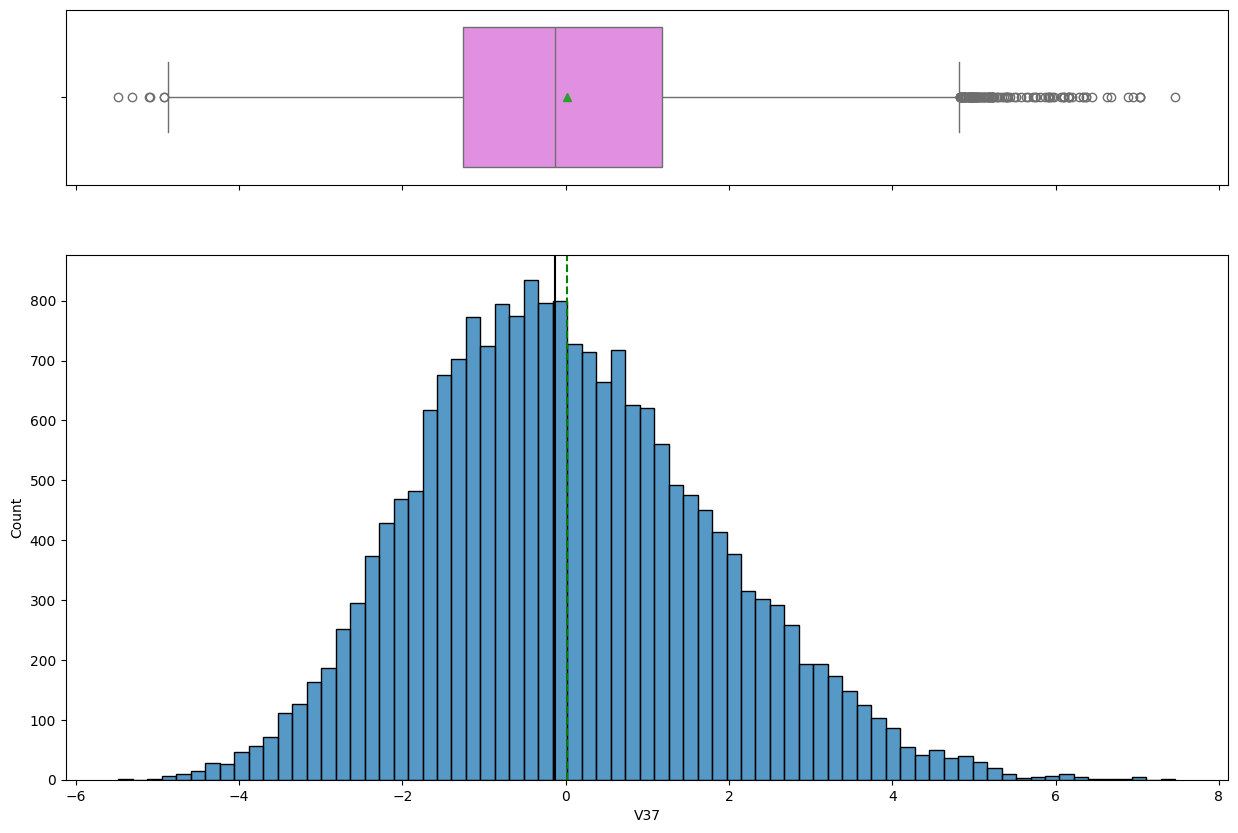

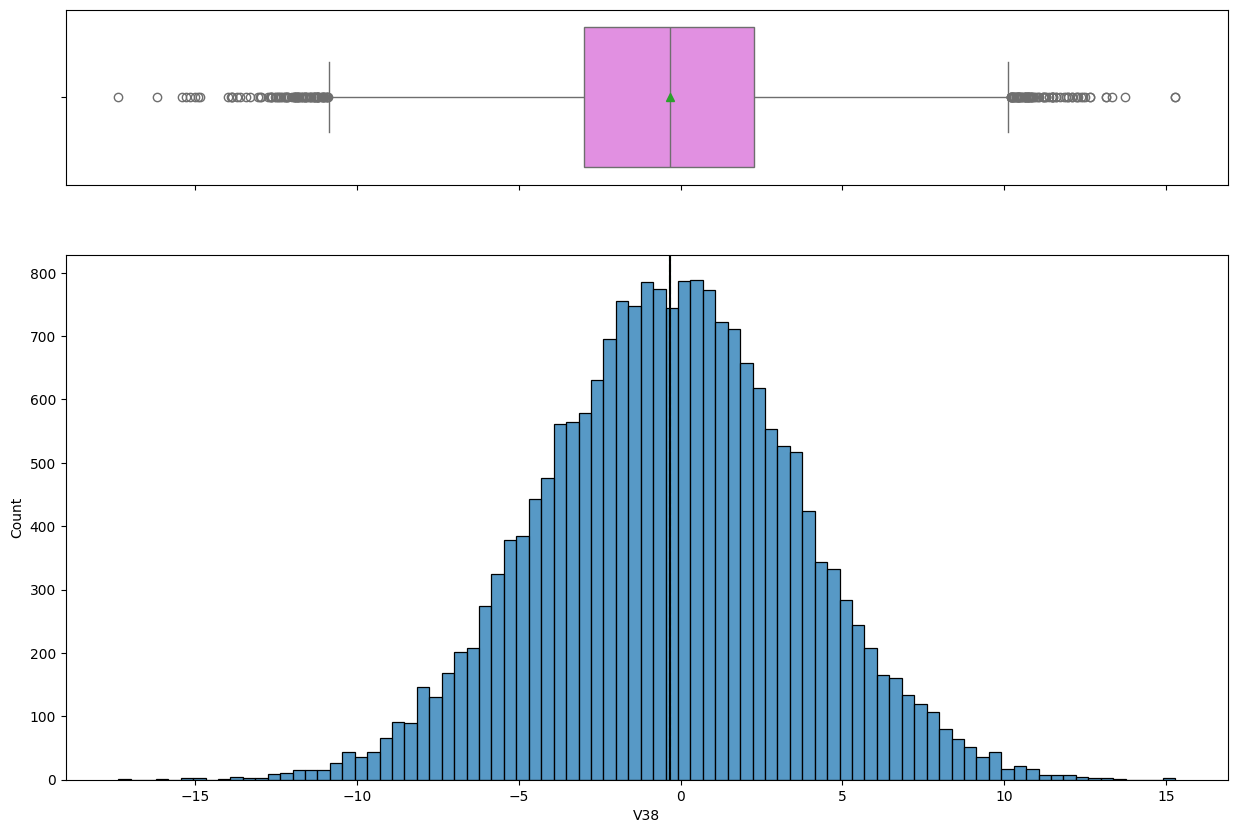

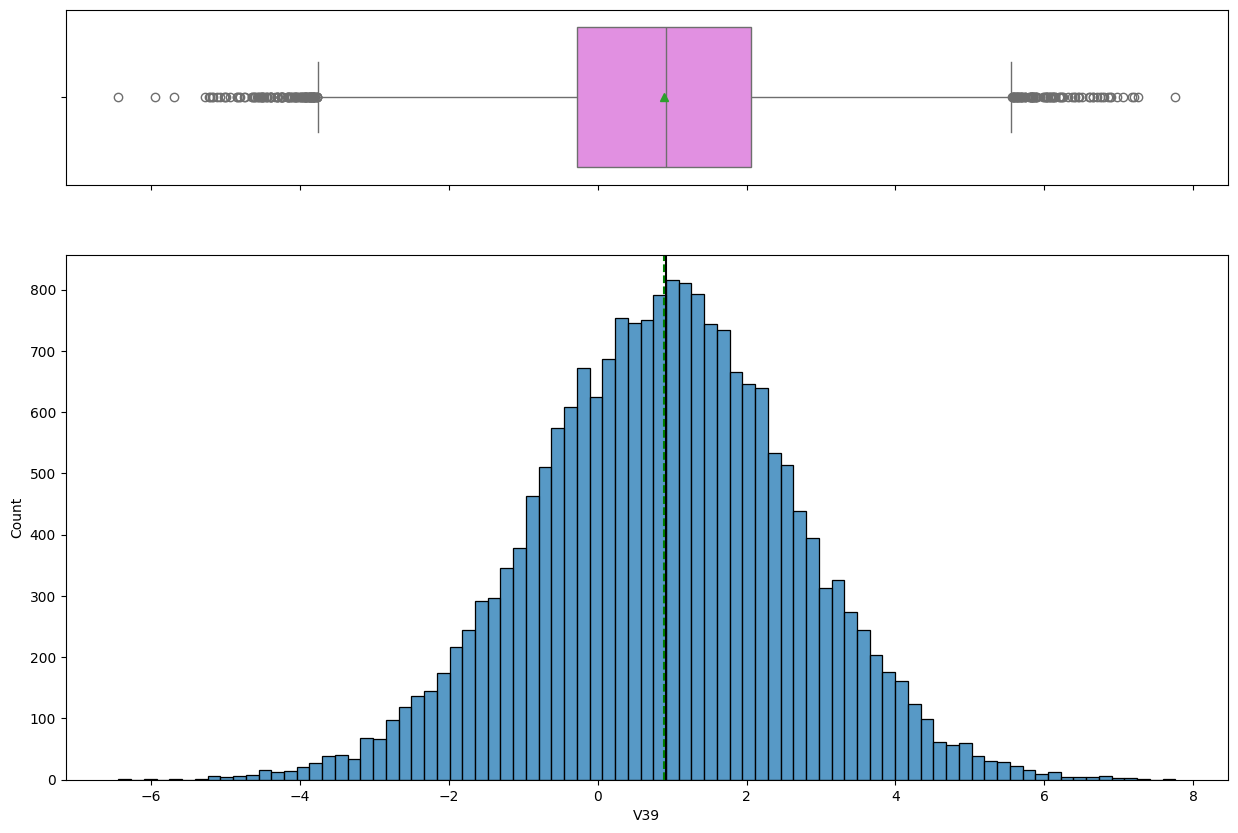

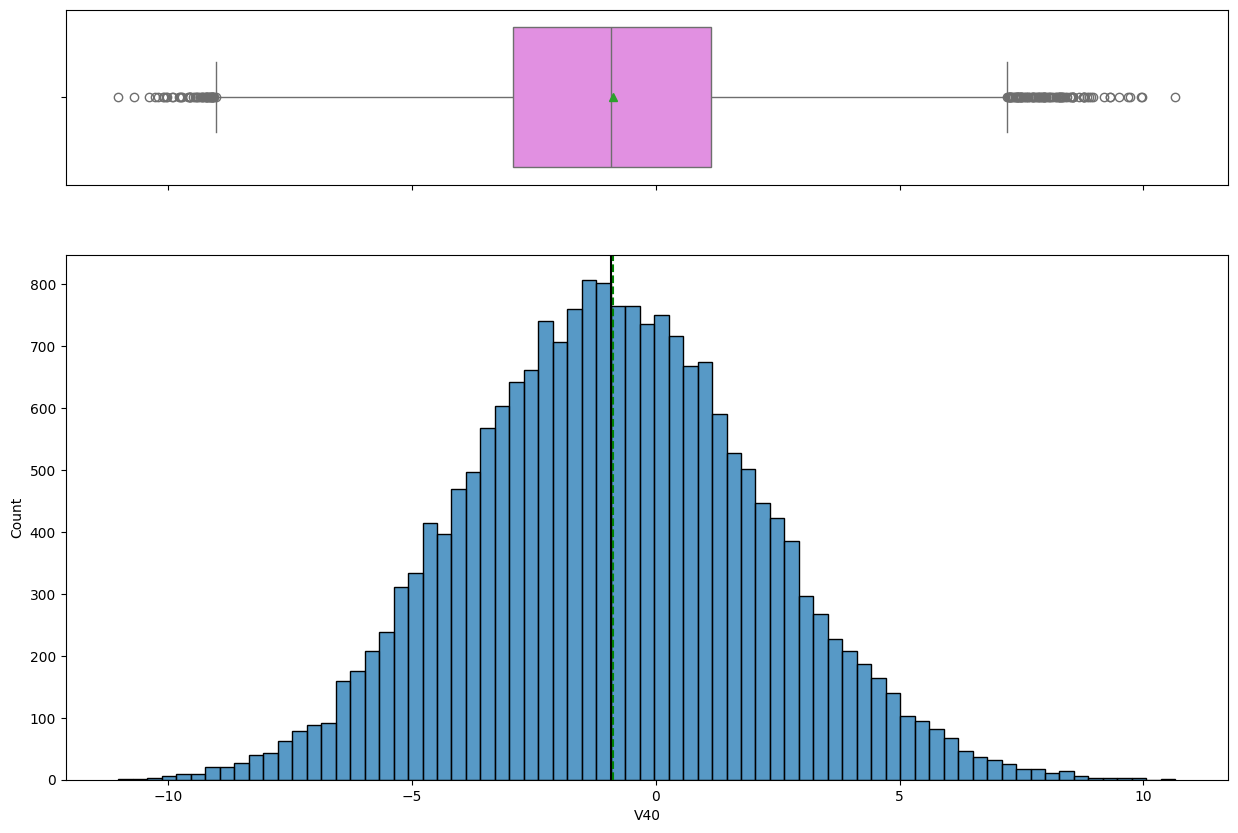

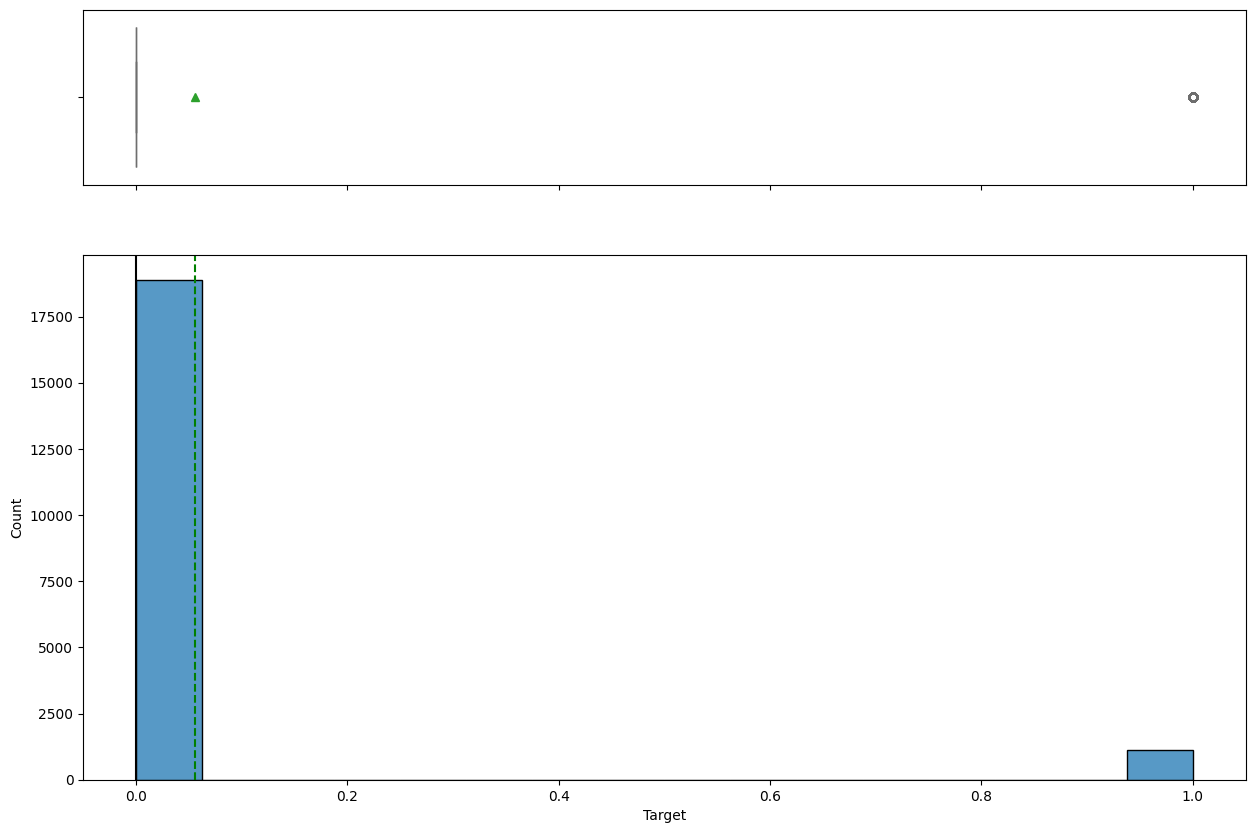

In [17]:
for feature in data_train.columns:
  histogram_boxplot(data_train,feature);
  #Clearly all of the features except target where it has imbalance are "almost" normally distributed with a lot of outliers

In [18]:
data_train['Target'].value_counts()
#Almost 18900 out of 20000 rows have 0 as their target(no failure) and 1 as failure

,count
Target,
0.0,18890
1.0,1110


## Bivariate Analysis

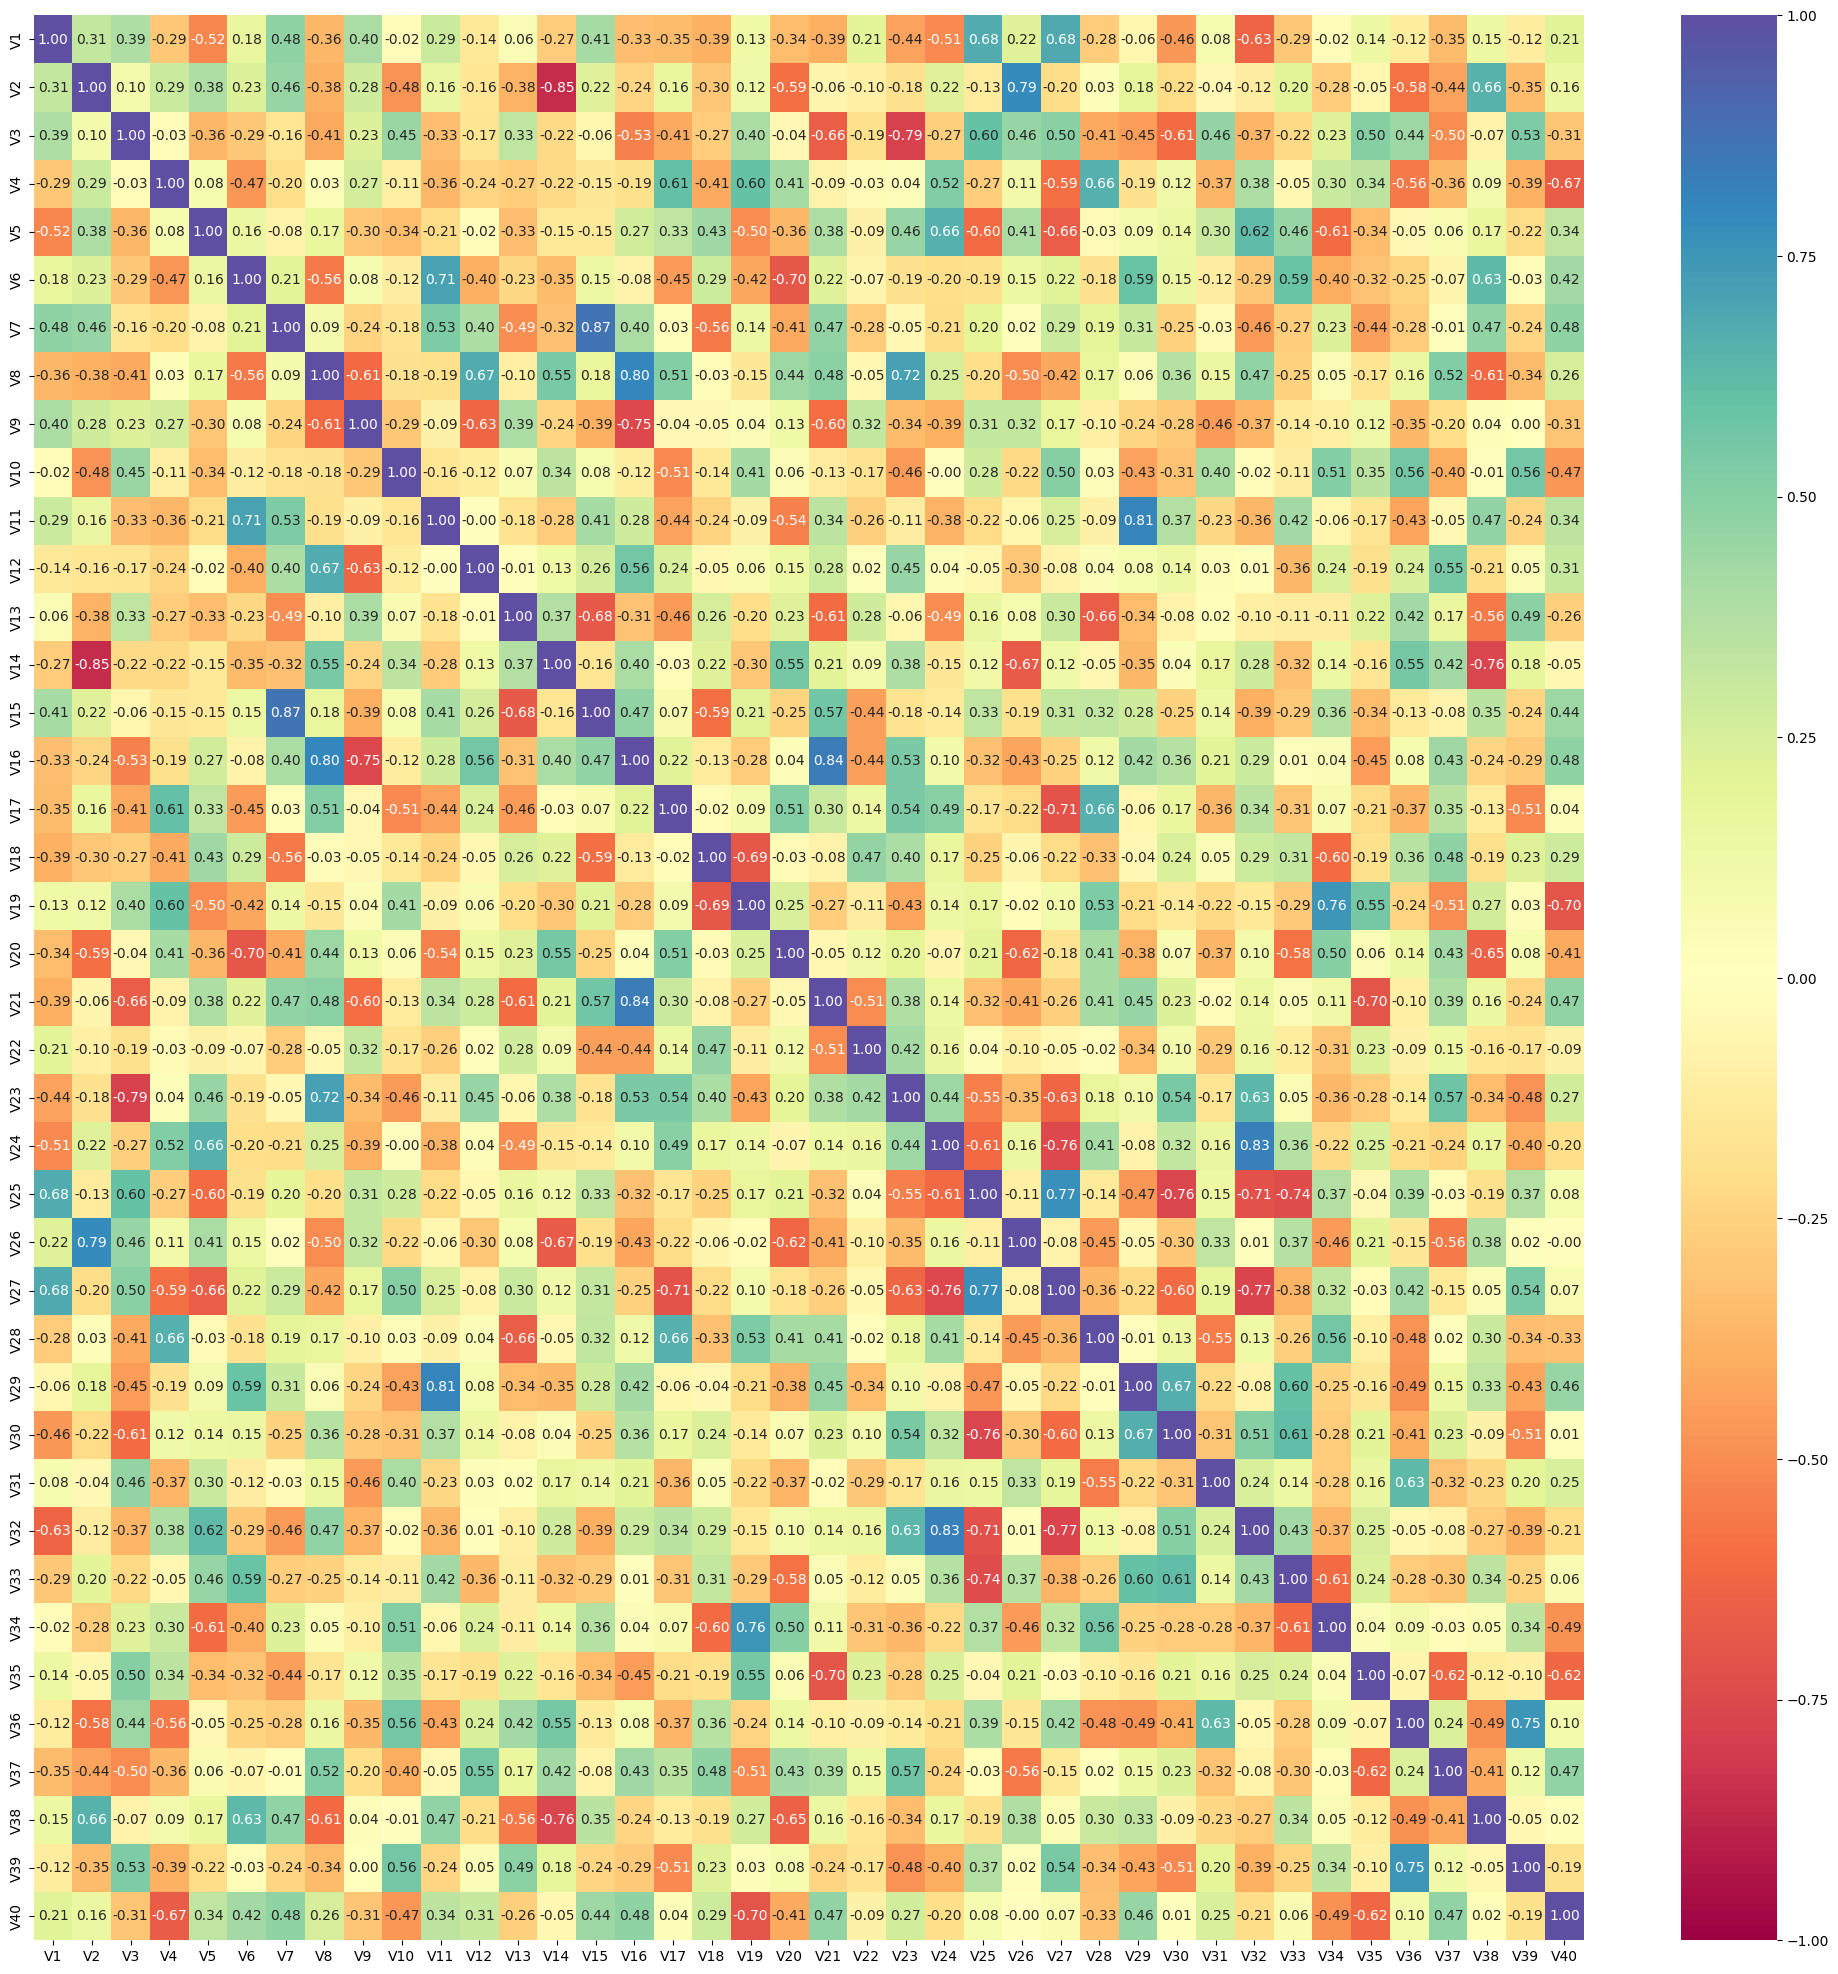

In [19]:
#lets do heatmap for bivariate analysis so that it gives correlation amongst all features at once without target
#removing target in the columns first
#sicne all columns are of float data type
cols_all=data_train.columns.tolist()
cols_all.remove('Target')
plt.figure(figsize=(25, 25))
sns.heatmap(data_train[cols_all].corr(), annot=True,cmap="Spectral",vmin=-1, vmax=1, fmt=".2f")
plt.show()
# As we can see, there has been a strong -ve correlation V2 and V14, V16 and V14,V35 and V40 and kind of +ve correlation between V7,V15 and V29 with V40 features

# **Data Preprocessing**

In [20]:
# Splitting of train data into X and y variables
X = data_train.drop(columns = ["Target"] , axis=1) # These are all independent features without dependent feature Target
Y = data_train["Target"] # This is a dependent feature Target

In [21]:
print(X.info())
print(Y.info())
#printing both X and Y from the train data set to see if correct features are dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)
#Split the data into train and val data sets and we dont need to further split this into a test data set here because we havea separate test data set loaded in to data_test variable already

In [23]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(16000, 40)
(4000, 40)
(16000,)
(4000,)


In [24]:
# Splitting of test data into X test and y_test variables
X_test = data_test.drop(columns = ["Target"] , axis=1) # These are all independent features without dependent feature Target
Y_test = data_test["Target"] # This is a dependent feature Target

In [25]:
print(X_test.info())
print(Y_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [26]:
X_train.isnull().sum()
#there are missing values and need to be filled for both v1 and v2 features

,0
V1,15
V2,15
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [27]:
#using fillna with lambda function and filling with median values
X_train['V1'] = X_train['V1'].transform(lambda x: x.fillna(x.median()))
X_train['V2'] = X_train['V2'].transform(lambda x: x.fillna(x.median()))
X_val['V1'] = X_val['V1'].transform(lambda x: x.fillna(x.median()))
X_val['V2'] = X_val['V2'].transform(lambda x: x.fillna(x.median()))
X_test['V1'] = X_test['V1'].transform(lambda x: x.fillna(x.median()))
X_test['V2'] = X_test['V2'].transform(lambda x: x.fillna(x.median()))

In [28]:
X_train.isnull().sum()
#there are no more missing values in X_train data set

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


# **Model Building**

In [29]:
#This function is used from MLS2 Job change prediction case study
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [30]:
#This function is also used in MLS2 Job change prediction case study and reusing it here
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [31]:
epochs = 25
batch_size = 64

In [32]:
tf.keras.backend.clear_session()

In [33]:
#Initialize the neural network with hidden layer and output layer
model0 = Sequential()
model0.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
#model.add(Dense(7,activation="relu"))
model0.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 589 (2.30 KB)

 Trainable params: 589 (2.30 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used to reduce loss
model0.compile(loss='binary_crossentropy', optimizer=optimizer,metrics = ['Recall'])
#Chose metrics as recall as i want to reduce false -ve

In [36]:
import time
start = time.time()
history = model0.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.5343 - loss: 0.3428 - val_Recall: 0.5405 - val_loss: 0.1331
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5043 - loss: 0.1266 - val_Recall: 0.6081 - val_loss: 0.1145
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5803 - loss: 0.1128 - val_Recall: 0.6396 - val_loss: 0.1041
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6066 - loss: 0.1002 - val_Recall: 0.6892 - val_loss: 0.0977
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6331 - loss: 0.0979 - val_Recall: 0.7027 - val_loss: 0.0926
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6412 - loss: 0.0944 - val_Recall: 0.7117 - val_loss: 0.0884
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6680 - loss: 0.0870 - val_Recall: 0.7252 - val_loss: 0.0853
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6978 - loss: 0.0882 - val_Recall: 0.7387 - val_loss: 0.0828
Epoch 9/

In [ ]:
history.history

{'Recall': [0.157657653093338,
  0.440315306186676,
  0.5349099040031433,
  0.5855855941772461,
  0.602477490901947,
  0.6272522807121277,
  0.6531531810760498,
  0.662162184715271,
  0.6801801919937134,
  0.6891891956329346,
  0.6880630850791931,
  0.6970720887184143,
  0.704954981803894,
  0.707207202911377,
  0.7139639854431152,
  0.7162162065505981,
  0.7195945978164673,
  0.7240990996360779,
  0.7263513803482056,
  0.7353603839874268,
  0.7353603839874268,
  0.7409909963607788,
  0.7488738894462585,
  0.755630612373352,
  0.7590090036392212],
 'loss': [0.20620526373386383,
  0.12075647711753845,
  0.106625035405159,
  0.09835833311080933,
  0.09255092591047287,
  0.088088758289814,
  0.08458277583122253,
  0.08182669430971146,
  0.07952024787664413,
  0.07784604281187057,
  0.0762404203414917,
  0.07480807602405548,
  0.07349514961242676,
  0.07237529009580612,
  0.07129163295030594,
  0.07037971913814545,
  0.06952584534883499,
  0.06880109012126923,
  0.06806668639183044,
  0.06

In [37]:
totaltime=end-start
print("time taken in seconds:",totaltime)

time taken in seconds: 19.531042337417603


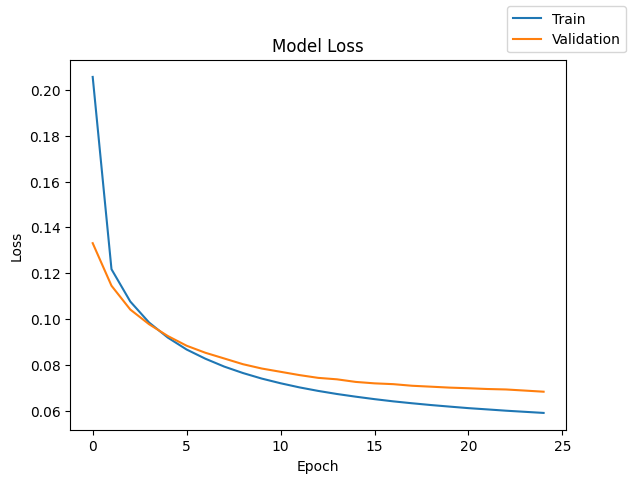

In [40]:
plot(history,'loss')
#loss has been converged at around 3 to4 epochs

In [41]:
model0_train_perf = model_performance_classification(model0, X_train, Y_train)
model0_train_perf
#As expected, recall and other scores works well on the train data set

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


,Accuracy,Recall,Precision,F1 Score
0,0.987563,0.987563,0.987406,0.986984


In [42]:
model0_val_perf = model_performance_classification(model0,X_val,Y_val)
model0_val_perf
#it is indicating a consistent performance of the model between training and valid data sets

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9875,0.9875,0.987263,0.986978


In [43]:
y_train_pred_0 = model0.predict(X_train)
y_val_pred_0 = model0.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [44]:
cr_train_model_0 = classification_report(Y_train,y_train_pred_0 > 0.5)
print(cr_train_model_0)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15112
         1.0       0.97      0.80      0.88       888

    accuracy                           0.99     16000
   macro avg       0.98      0.90      0.94     16000
weighted avg       0.99      0.99      0.99     16000



In [45]:
cr_val_model_0 = classification_report(Y_val,y_val_pred_0 > 0.5)
print(cr_val_model_0)
#Report scores are good

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.96      0.81      0.88       222

    accuracy                           0.99      4000
   macro avg       0.98      0.90      0.94      4000
weighted avg       0.99      0.99      0.99      4000



# **Model Performance Improvement**

## Model 1

In [46]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()
#clearing the previous session before we add one more layer

In [47]:
#Initializing the neural network
model1 = Sequential()
model1.add(Dense(14 ,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(7,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
#Added one more hidden layer with 7 neurons

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
optimizer = tf.keras.optimizers.SGD()
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])
#usinig same metrics and other details as above to add apple to apple comparison. Its good to try with adding momentum as well since elarning rate has been reduced especially after 3rd epoch in model0

In [50]:
start = time.time()
history = model1.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.3335 - loss: 0.2314 - val_Recall: 0.2973 - val_loss: 0.1428
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.3753 - loss: 0.1395 - val_Recall: 0.4279 - val_loss: 0.1233
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4319 - loss: 0.1185 - val_Recall: 0.4730 - val_loss: 0.1119
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4895 - loss: 0.1117 - val_Recall: 0.5405 - val_loss: 0.1042
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5275 - loss: 0.1045 - val_Recall: 0.5991 - val_loss: 0.0989
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.5804 - loss: 0.1010 - val_Recall: 0.6126 - val_loss: 0.0954
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.5910 - loss: 0.0946 - val_Recall: 0.6216 - val_loss: 0.0921
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.6247 - loss: 0.0926 - val_Recall: 0.6441 - val_loss: 0.0896
Epoch 9/

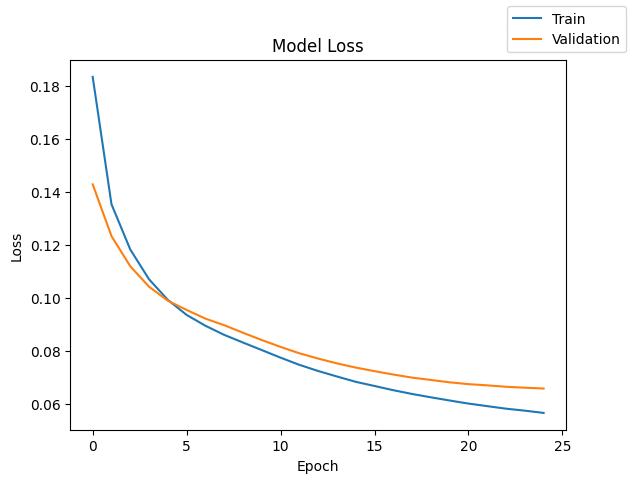

In [51]:
plot(history,'loss')

In [52]:
model1_train_perf = model_performance_classification(model1, X_train, Y_train)
model1_train_perf
#recall and other scores are almost identical  on the train data set even after adding one more layer

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.989062,0.989062,0.988883,0.988671


In [53]:
model1_val_perf = model_performance_classification(model1,X_val,Y_val)
model1_val_perf
#So there has not been much difference even after adding one more layer

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98775,0.98775,0.987644,0.98716


In [54]:
y_train_pred_1 = model1.predict(X_train)
y_val_pred_1 = model1.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [55]:
CR_train_model_1 = classification_report(Y_train,y_train_pred_1 > 0.5)
print(CR_train_model_1)
#REcall has been good with macro and weighted avg

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15112
         1.0       0.97      0.83      0.89       888

    accuracy                           0.99     16000
   macro avg       0.98      0.91      0.94     16000
weighted avg       0.99      0.99      0.99     16000



In [56]:
cr_val_model_1 = classification_report(Y_val,y_val_pred_1 > 0.5)
print(cr_val_model_1)
#Consistent performance between train and val data sets with 2 hidden layers

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.98      0.80      0.88       222

    accuracy                           0.99      4000
   macro avg       0.98      0.90      0.94      4000
weighted avg       0.99      0.99      0.99      4000



## Model 2

In [57]:
#lets try with adding momentum for model1
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [58]:
model2 = Sequential()
model2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dense(7,activation="relu"))
model2.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
optimizer = tf.keras.optimizers.Adam()
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])
#usinig same metrics and other details as above to add apple to apple comparison but by adding little more momentum.

In [61]:
start = time.time()
history = model2.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Recall: 0.4202 - loss: 0.2261 - val_Recall: 0.6622 - val_loss: 0.0986
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.6483 - loss: 0.0979 - val_Recall: 0.7477 - val_loss: 0.0845
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7141 - loss: 0.0794 - val_Recall: 0.7432 - val_loss: 0.0748
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7571 - loss: 0.0667 - val_Recall: 0.7613 - val_loss: 0.0709
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8105 - loss: 0.0506 - val_Recall: 0.8063 - val_loss: 0.0662
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8299 - loss: 0.0556 - val_Recall: 0.8243 - val_loss: 0.0648
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8244 - loss: 0.0565 - val_Recall: 0.8378 - val_loss: 0.0627
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8546 - loss: 0.0479 - val_Recall: 0.8423 - val_loss: 0.0624
Epoch 9/

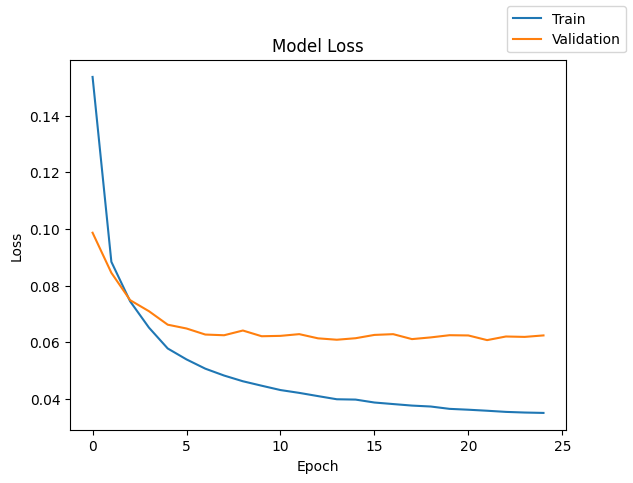

In [62]:
plot(history,'loss')
#loss has been  increased

In [63]:
model2_train_perf = model_performance_classification(model2, X_train, Y_train)
model2_train_perf
#recall and other scores have definitely improved after adding adam optimizer for train data set

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.993938,0.993938,0.993917,0.993801


In [64]:
model2_val_perf = model_performance_classification(model2,X_val,Y_val)
model1_val_perf
#So there has not been much difference even after adding one more layer with momentum on validation data set

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98775,0.98775,0.987644,0.98716


In [65]:
y_train_pred_2 = model2.predict(X_train)
y_val_pred_2 = model2.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [66]:
CR_train_model_2 = classification_report(Y_train,y_train_pred_2 > 0.5)
print(CR_train_model_2)
#REcall has been increased with macro avg

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15112
         1.0       0.99      0.90      0.94       888

    accuracy                           0.99     16000
   macro avg       0.99      0.95      0.97     16000
weighted avg       0.99      0.99      0.99     16000



In [67]:
cr_val_model_2 = classification_report(Y_val,y_val_pred_2 > 0.5)
print(cr_val_model_2)
#Consistent performance between train and val data sets with 2 hidden layers and momentum

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.96      0.86      0.91       222

    accuracy                           0.99      4000
   macro avg       0.98      0.93      0.95      4000
weighted avg       0.99      0.99      0.99      4000



## Model 3

In [68]:
#lets treat imnbalance since there are less 1's in the target
Y_train.value_counts()

,count
Target,
0.0,15112
1.0,888


In [69]:
Y_train.shape

(16000,)

In [70]:
# Calculate class weights for imbalanced dataset
cw = (Y_train.shape[0]) / np.bincount(Y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

In [71]:
tf.keras.backend.clear_session()

In [72]:
model3 = Sequential()
model3.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model3.add(Dense(7,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
optimizer = tf.keras.optimizers.Adam()
model3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])
#usinig same metrics as model 2 but treating the class imbalance for model 3

In [75]:
start = time.time()
history = model3.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()
#here added the class weight parameter

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Recall: 0.4326 - loss: 1.5640 - val_Recall: 0.7973 - val_loss: 0.3770
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8264 - loss: 0.6857 - val_Recall: 0.8739 - val_loss: 0.2913
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8797 - loss: 0.5353 - val_Recall: 0.8919 - val_loss: 0.2573
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.9073 - loss: 0.4734 - val_Recall: 0.8829 - val_loss: 0.1980
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8919 - loss: 0.4430 - val_Recall: 0.8874 - val_loss: 0.1892
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.9021 - loss: 0.4073 - val_Recall: 0.8964 - val_loss: 0.1722
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8955 - loss: 0.3995 - val_Recall: 0.8919 - val_loss: 0.1626
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.9108 - loss: 0.3708 - val_Recall: 0.8874 - val_loss: 0.1571
Epoch 9/

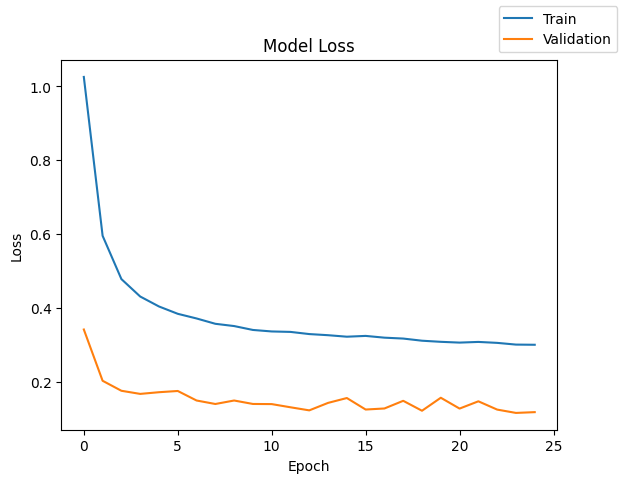

In [ ]:
plot(history,'loss')
#Clearly the loss has been increased after treating the imbalance using class wieghts

In [129]:
model3_train_perf = model_performance_classification(model3, X_train, Y_train)
model3_train_perf
#recall and other scores are the same after adding adam optimizer for train data set

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.97775,0.97775,0.98103,0.978839


In [130]:
model3_val_perf = model_performance_classification(model3,X_val,Y_val)
model3_val_perf
#So there has not been much difference even after adding one more layer with momentum on validation data set even after treating class imablance

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9765,0.9765,0.979582,0.977571


In [131]:
y_train_pred3 = model3.predict(X_train)
y_val_pred3 = model3.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [132]:
cr_train_model_3 = classification_report(Y_train,y_train_pred3 > 0.5)
print(cr_train_model_3)
#Recall scores has been pretty flattened out on the train data set

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15112
         1.0       0.74      0.92      0.82       888

    accuracy                           0.98     16000
   macro avg       0.87      0.95      0.90     16000
weighted avg       0.98      0.98      0.98     16000



In [133]:
cr_val_model_3 = classification_report(Y_val , y_val_pred_3 > 0.5)
print(cr_val_model_3)
#Validation set score are good for recall too

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      3778
         1.0       0.74      0.90      0.81       222

    accuracy                           0.98      4000
   macro avg       0.87      0.94      0.90      4000
weighted avg       0.98      0.98      0.98      4000



## Model 4

In [80]:
tf.keras.backend.clear_session()

In [ ]:
#For this model, lets do the drop out and check the score

In [81]:
model4 = Sequential()
model4.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model4.add(Dropout(0.3)) #dropping 30%
model4.add(Dense(7,activation = "relu"))
model4.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
#lets not add momentum and go back to SGD since loss has been less compared to Adam optimizer
optimizer = tf.keras.optimizers.SGD()
model4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [84]:
start = time.time()
history = model4.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - Recall: 0.1976 - loss: 0.4234 - val_Recall: 0.1532 - val_loss: 0.1895
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1445 - loss: 0.1974 - val_Recall: 0.1937 - val_loss: 0.1628
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.1687 - loss: 0.1823 - val_Recall: 0.2703 - val_loss: 0.1467
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.2439 - loss: 0.1608 - val_Recall: 0.3559 - val_loss: 0.1351
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.3356 - loss: 0.1419 - val_Recall: 0.4189 - val_loss: 0.1262
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.3543 - loss: 0.1427 - val_Recall: 0.4685 - val_loss: 0.1199
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4071 - loss: 0.1287 - val_Recall: 0.4775 - val_loss: 0.1151
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.3856 - loss: 0.1325 - val_Recall: 0.4865 - val_loss: 0.1109
Epoch 9

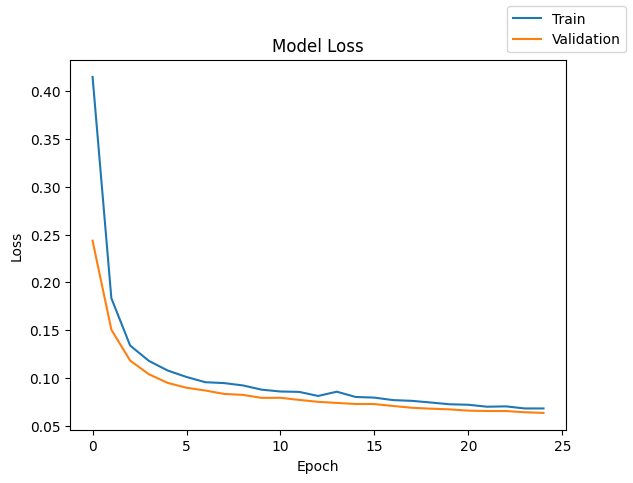

In [134]:
plot(history,'loss')
#loss has not been coverged but has been reduced with SGD over Adam

In [135]:
model_4_train_perf = model_performance_classification(model4,X_train,Y_train)
model_4_train_perf
#Recall has been slightly reduced with dropout on train daat set

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.978938,0.978938,0.978018,0.977473


In [136]:
model_4_val_perf = model_performance_classification(model4,X_val,Y_val)
model_4_val_perf
#same with validation data set as well

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.97925,0.97925,0.978241,0.978086


In [88]:
y_train_pred_4 = model4.predict(X_train)
y_val_pred_4 = model4.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [89]:
cr_train_model_4 = classification_report(Y_train,y_train_pred_4 > 0.5)
print(cr_train_model_4)
#Classificaiton reprot on the recall score has been drastically reduced

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     15112
         1.0       0.92      0.68      0.78       888

    accuracy                           0.98     16000
   macro avg       0.95      0.84      0.89     16000
weighted avg       0.98      0.98      0.98     16000



In [90]:
cr_val_model_4 = classification_report(Y_train,y_train_pred_4 > 0.5)
print(cr_train_model_4)
#same with validation data set too

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     15112
         1.0       0.92      0.68      0.78       888

    accuracy                           0.98     16000
   macro avg       0.95      0.84      0.89     16000
weighted avg       0.98      0.98      0.98     16000



## Model 5

In [91]:
tf.keras.backend.clear_session()

In [92]:
#now lets add the dropout with adam optimizer but not SGD
model5 = Sequential()
model5.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model5.add(Dropout(0.3)) #dropping 30%
model5.add(Dense(7,activation = "relu"))
model5.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
optimizer = tf.keras.optimizers.Adam()
model5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])
#just want to try out adam with dropout this time especially SGD messed up recall score little bit

In [96]:
start = time.time()
history = model5.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.1732 - loss: 0.2770 - val_Recall: 0.3829 - val_loss: 0.1237
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4164 - loss: 0.1384 - val_Recall: 0.5541 - val_loss: 0.0983
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4800 - loss: 0.1162 - val_Recall: 0.6757 - val_loss: 0.0858
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5551 - loss: 0.0965 - val_Recall: 0.7207 - val_loss: 0.0775
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.5835 - loss: 0.0934 - val_Recall: 0.7432 - val_loss: 0.0738
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6364 - loss: 0.0928 - val_Recall: 0.7613 - val_loss: 0.0701
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.6479 - loss: 0.0894 - val_Recall: 0.7838 - val_loss: 0.0691
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7137 - loss: 0.0759 - val_Recall: 0.8018 - val_loss: 0.0701
Epoch 9/

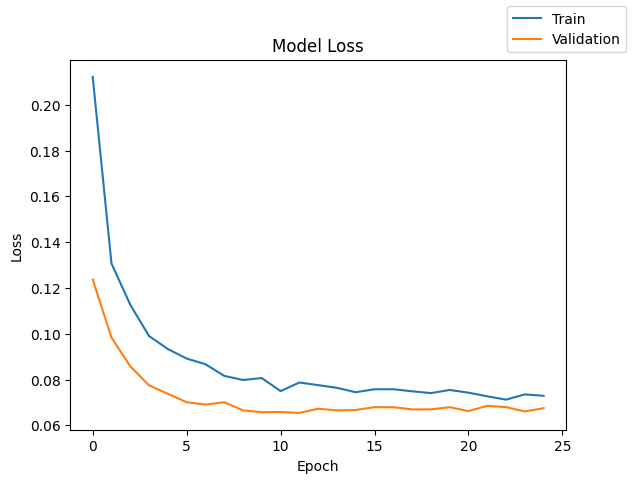

In [98]:
plot(history,'loss')
#almost similar to adam above

In [99]:
model_5_train_perf = model_performance_classification(model5,X_train,Y_train)
model_5_train_perf
#yes recall went up little bit with SGD on train data set

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.987375,0.987375,0.98739,0.986675


In [100]:
model_5_val_perf = model_performance_classification(model5,X_val,Y_val)
model_5_val_perf
#same with validation data set too as expected

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98775,0.98775,0.987761,0.987095


In [101]:
y_train_pred_5 = model5.predict(X_train)
y_val_pred_5 = model5.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [102]:
cr_train_model_5 = classification_report(Y_train,y_train_pred_5 > 0.5)
print(cr_train_model_5)
#increased with model 4 to compare

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15112
         1.0       0.99      0.78      0.87       888

    accuracy                           0.99     16000
   macro avg       0.99      0.89      0.93     16000
weighted avg       0.99      0.99      0.99     16000



In [103]:
cr_val_model_5 = classification_report(Y_train,y_train_pred_5 > 0.5)
print(cr_train_model_5)
#same as above

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15112
         1.0       0.99      0.78      0.87       888

    accuracy                           0.99     16000
   macro avg       0.99      0.89      0.93     16000
weighted avg       0.99      0.99      0.99     16000



## Model 6

In [104]:
tf.keras.backend.clear_session()

In [105]:
#now lets add the dropout with SGD optimizer but not Adam
model6 = Sequential()
model6.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model6.add(Dropout(0.3)) #dropping 30%
model6.add(Dense(7,activation = "relu"))
model6.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
optimizer = tf.keras.optimizers.SGD()
model6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'],)
#just want to try out adam with dropout this time especially SGD messed up recall score little bit

In [108]:
start = time.time()
history = model6.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - Recall: 0.7027 - loss: 1.2897 - val_Recall: 0.8468 - val_loss: 0.4623
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - Recall: 0.7803 - loss: 0.7998 - val_Recall: 0.8694 - val_loss: 0.3138
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Recall: 0.8215 - loss: 0.6693 - val_Recall: 0.8694 - val_loss: 0.2471
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8335 - loss: 0.6400 - val_Recall: 0.8784 - val_loss: 0.2753
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8736 - loss: 0.5617 - val_Recall: 0.8739 - val_loss: 0.2562
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8726 - loss: 0.5629 - val_Recall: 0.8829 - val_loss: 0.2931
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8684 - loss: 0.5608 - val_Recall: 0.8694 - val_loss: 0.2420
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8558 - loss: 0.5573 - val_Recall: 0.8694 - val_loss: 0.2482
Epoch 9

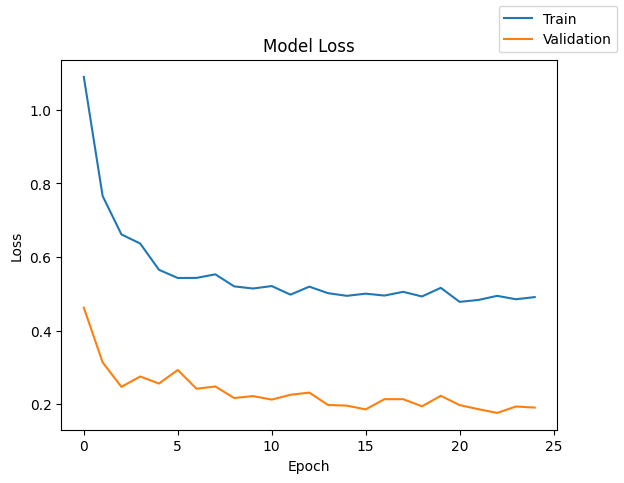

In [109]:
plot(history,'loss')
#wow, there has not been convergence and loss has been tremendous

In [110]:
model_6_train_perf = model_performance_classification(model6,X_train,Y_train)
model_6_train_perf
#yes recall reduced  little bit with SGD on train data set after dropout

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.971437,0.971437,0.976968,0.973276


In [111]:
model_6_val_perf = model_performance_classification(model6,X_val,Y_val)
model_6_val_perf
#recall reduced too on validatan data set

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.969,0.969,0.974686,0.970966


In [112]:
y_train_pred_6 = model6.predict(X_train)
y_val_pred_6 = model6.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [113]:
cr_train_model_6 = classification_report(Y_train,y_train_pred_6 > 0.5)
print(cr_train_model_6)
#Not bad, recall score are OK on train data set

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     15112
         1.0       0.68      0.90      0.78       888

    accuracy                           0.97     16000
   macro avg       0.84      0.94      0.88     16000
weighted avg       0.98      0.97      0.97     16000



In [114]:
cr_val_model_6 = classification_report(Y_train,y_train_pred_6 > 0.5)
print(cr_train_model_6)
#same as above

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     15112
         1.0       0.68      0.90      0.78       888

    accuracy                           0.97     16000
   macro avg       0.84      0.94      0.88     16000
weighted avg       0.98      0.97      0.97     16000



# Model 7

In [115]:
tf.keras.backend.clear_session()

In [116]:
#lets add batch normalization to the model 1 and try
model7 = Sequential()
model7.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model7.add(BatchNormalization())
model7.add(Dense(7,activation="relu"))
model7.add(BatchNormalization())
model7.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
model7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 42 (168.00 B)

In [118]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used because Adam hasnt producing better result
model7.compile(loss='binary_crossentropy', optimizer=optimizer)

In [119]:
start = time.time()
history = model7.fit(X_train, Y_train, validation_data=(X_val,Y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()
#plain vanilla one without dropout and class weights

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5605 - val_loss: 0.2437
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2098 - val_loss: 0.1505
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1394 - val_loss: 0.1181
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1217 - val_loss: 0.1038
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1105 - val_loss: 0.0948
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1034 - val_loss: 0.0897
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1018 - val_loss: 0.0868
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0889 - val_loss: 0.0833
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0959 - val_loss: 0.0822
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0902 - val_loss: 0.0791
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0869 - val_loss: 0.0792
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

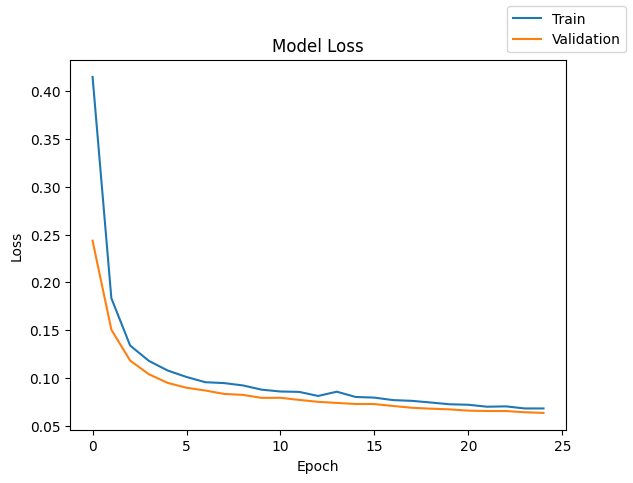

In [120]:
plot(history,'loss')
#This shows clearly promising as the loss has been reducing

In [121]:
model7_train_perf = model_performance_classification(model7, X_train, Y_train)
model7_train_perf
#as expected working well on the train data set

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98675,0.98675,0.986702,0.986007


In [122]:
model7_val_perf = model_performance_classification(model7, X_val, Y_val)
model7_val_perf
#not bad with val data set too

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.98725,0.98725,0.987142,0.986602


In [123]:
y_train_pred_7 = model7.predict(X_train)
y_val_pred_7 = model7.predict(X_val)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [124]:
CR_train_model_7 = classification_report(Y_train,y_train_pred_7 > 0.5)
print(CR_train_model_7)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15112
         1.0       0.98      0.77      0.87       888

    accuracy                           0.99     16000
   macro avg       0.98      0.89      0.93     16000
weighted avg       0.99      0.99      0.99     16000



In [126]:
CR_val_model_7 = classification_report(Y_val,y_val_pred_7 > 0.5)
print(CR_val_model_7)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3778
         1.0       0.98      0.79      0.87       222

    accuracy                           0.99      4000
   macro avg       0.98      0.89      0.93      4000
weighted avg       0.99      0.99      0.99      4000



# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [140]:
# training performance comparison- This code has been reused from MLS job change prediction case study

models_train_comp_df = pd.concat(
    [
        model0_train_perf.T,
        model1_train_perf.T,
        model2_train_perf.T,
        model3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model7_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No dropout, No regularization)",
    "Neural Network (SGD No Momentum, No Regularization but one more layer)",
    "Neural Network (Adam , No Regularization but with one hidden and output)",
    "Neural Network (Adam, with class weight)",
    "Neural Network (SGD, dropout[0.3])",
    "Neural Network (Adam, dropout)",
    "Neural Network (SGD, with dropout [0.3])",
    "Neural Network (SGD, with normalization)"
]

In [144]:
models_val_comp_df = pd.concat(
    [
        model0_val_perf.T,
        model1_val_perf.T,
        model2_val_perf.T,
        model3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T,
        model7_val_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Neural Network (SGD, No dropout, No regularization)",
    "Neural Network (SGD No Momentum, No Regularization but one more layer)",
    "Neural Network (Adam , No Regularization but with one hidden and output)",
    "Neural Network (Adam, with class weight)",
    "Neural Network (SGD, dropout[0.3])",
    "Neural Network (Adam, dropout)",
    "Neural Network (SGD, with dropout [0.3])",
    "Neural Network (SGD, with normalization)"
]

In [142]:
print(models_train_comp_df)

           Neural Network (SGD, No dropout, No regularization)  \
Accuracy                                            0.987563     
Recall                                              0.987563     
Precision                                           0.987406     
F1 Score                                            0.986984     

           Neural Network (SGD No Momentum, No Regularization but one more layer)  \
Accuracy                                            0.989062                        
Recall                                              0.989062                        
Precision                                           0.988883                        
F1 Score                                            0.988671                        

           Neural Network (Adam , No Regularization but with one hidden and output)  \
Accuracy                                            0.993938                          
Recall                                              0.993938         

In [145]:
print(models_val_comp_df)

           Neural Network (SGD, No dropout, No regularization)  \
Accuracy                                            0.987500     
Recall                                              0.987500     
Precision                                           0.987263     
F1 Score                                            0.986978     

           Neural Network (SGD No Momentum, No Regularization but one more layer)  \
Accuracy                                            0.987750                        
Recall                                              0.987750                        
Precision                                           0.987644                        
F1 Score                                            0.987160                        

           Neural Network (Adam , No Regularization but with one hidden and output)  \
Accuracy                                            0.990250                          
Recall                                              0.990250         

In [148]:
models_train_comp_df.loc["Recall"] - models_val_comp_df.loc["Recall"]
#i will choose model 2 since it is indicating strong performance on train and test data sets

,Recall
"Neural Network (SGD, No dropout, No regularization)",0.000062
"Neural Network (SGD No Momentum, No Regularization but one more layer)",0.001312
"Neural Network (Adam , No Regularization but with one hidden and output)",0.003688
"Neural Network (Adam, with class weight)",0.001250
"Neural Network (SGD, dropout[0.3])",-0.000312
"Neural Network (Adam, dropout)",-0.000375
"Neural Network (SGD, with dropout [0.3])",0.002437
"Neural Network (SGD, with normalization)",-0.000500


Now, let's check the performance of the final model on the test set.

In [149]:
best_model_test_perf = model_performance_classification(model2,X_test,Y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9902,0.9902,0.990112,0.989856


In [150]:
y_test_pred_best = model2.predict(X_test)
cr_test_best_model = classification_report(Y_test, y_test_pred_best>0.5)
print(cr_test_best_model)
#This is a good model on test performance as well- Yay, lets go with this model

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4718
         1.0       0.98      0.84      0.91       282

    accuracy                           0.99      5000
   macro avg       0.99      0.92      0.95      5000
weighted avg       0.99      0.99      0.99      5000



# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

1. Tried to evaluate all 7 models starting with SGD, Adam as optimiziers.
2. Tried to add 2 hidden layers and recall score hasnt been improved much with an additional layer
3. Overall, Adam as the optimizier worked well over SGD as recall score has been around 99% on both train and validation data sets
4. Added batch normalization as well with one hidden layer and SGD as optimizer and score has been same
5. Treating class imbalance and drop out has been the same and unfortunately not showed much improvement in recall score
6. Chose recall score as the metric since false negative is dangerous and involve more repair costs